Using matplotlib backend: TkAgg
1278


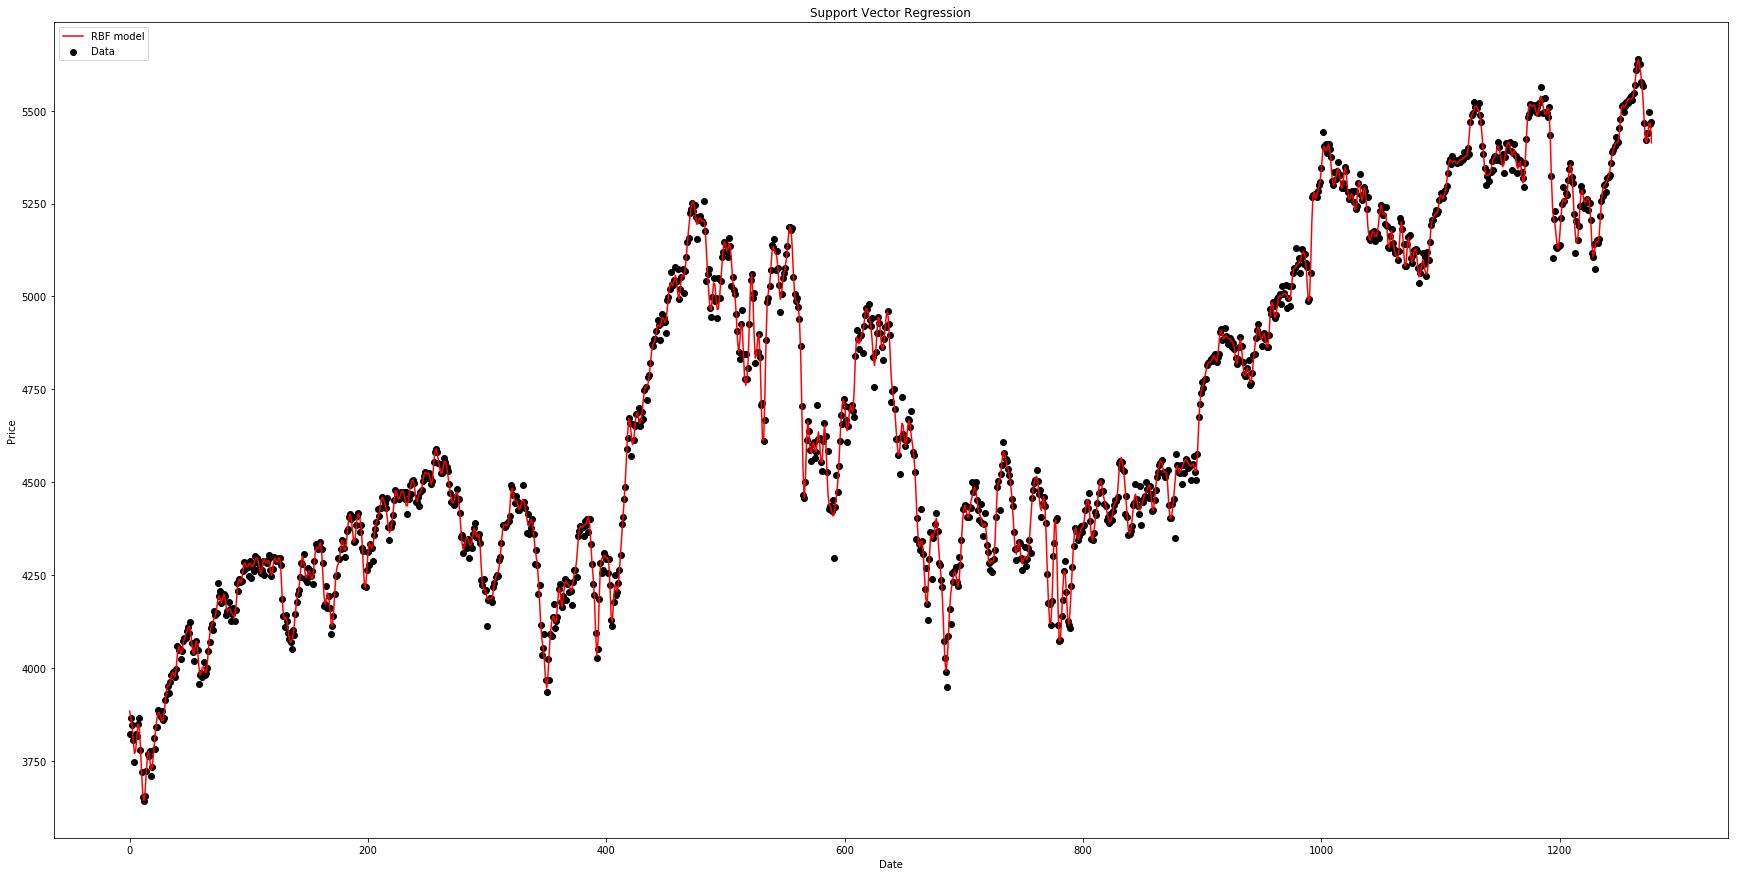

1278
5299.665365245893


In [1]:
# SVR
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 15.0)

import csv
import numpy as np
from sklearn.svm import SVR


dates = []
real_dates = []
prices = []

i = 0

def read_data(filename):
    global i
    i = 0
    with open(filename, 'r') as csvFile:
        csvFileReader = csv.reader(csvFile)
        next(csvFileReader)
        for row in csvFileReader:
            real_dates.append(row[0])
            dates.append(i)
            prices.append(float(row[1]))
            i = i+1
        print(i)
    return

def price_prediction_model(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_rbf = SVR(kernel='rbf',C=1e3, gamma = 0.1)
        
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.savefig('test.png', bbox_inches='tight')
    plt.show()
    return svr_rbf.predict(x)[0] 

read_data('CAC40_5Y.csv')

predicted_price = price_prediction_model(dates, prices, i)

print(i)
print(predicted_price)
#SVM not very good at price prediction with 1YR data set
#SVM not very good at price prediction with 5YR data set
# which is normal since SVM is not very good whith large data sets


In [1]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  if output in :
                - ]-1, -0.33[ then sell
                - [-0.33, 0.33] then hodl
                - ]0.33, 1[ then buy
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import math
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []

# 1 -> buy
# -1 -> sell
# 0 -> hodl
def decide(res):
    if (res > 0.33):
        return 1.0
    elif (res < -0.33):
        return -1.0
    else:
        return 0.0

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2017.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2017_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                #input_data = (input_data) + (shares,money,)
                output = net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    money = money + input_training_data[i+1][0] #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money > input_training_data[i+1][0]):
                    shares = shares+1
                    money = money - input_training_data[i+1][0] #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[size-1][0]) - 100000.0)/1000.0 #returns in %
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - 50
        #if(genome.hodl_count > genome.sell_count + genome.buy_count):
        #    op_sum = genome.sell_count + genome.buy_count
        #    penality = 80
        #    if (op_sum != 0):
        #        penality == 30*genome.hodl_count/(op_sum)

        #   genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

# Run for up to X generations.
winner = p.run(eval_genomes, NONE)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume', 0:'Decide'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)



FileNotFoundError: [Errno 2] No such file or directory: 'CAC40_2005_2017.csv'

In [1]:


from __future__ import print_function
import os
import neat
import visualize
import csv
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-673')
winner = p.run(eval_genomes, 100)

winner_net = neat.nn.RecurrentNetwork.create(winner, config)


"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                string_dec = ''
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1
                    string_dec = 'Sell'

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                    string_dec = 'Buy'
                else: 
                    hodl_count = hodl_count+1
                    string_dec = 'Hodl'
                
               # print('{!r}->{!s}: (Money: {!r}, Shares: {!r})'.format(i,string_dec,capital,shares))
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        


print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)


NameError: name 'TraderGenome' is not defined

In [1]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  -transform output from ]-1,1[ to ]-5,5[
            -compute the floor of the absolute value of the output and its sign
            -output > 0 then buy or sell (sign -1 sell, sign +1 buy)
            -output = 0 then hodl 
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import numpy as np
import math

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []    
    

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2014.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2015_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


# input:
#    res[0] -> buy
#    res[1] -> hodl
#    res[2] -> sell
#    res[3] -> quantity
#
# firt output:
#    1 -> buy
#    -1 -> sell
#    0 -> hodl
# second output: share amount to buy/sell
def decide(output):
    amount = np.arctanh(output[3]) #denormalizing shares amount ???
    values = output[:3]
    i = values.index(max(values))
    if(np.isinf(amount) or np.isnan(amount)):
        amount = 0
        res = 0
    elif i==0:
        res = 1
    elif i==1:
        res = 0
    elif i==2:
        res = -1
    return res, math.floor(amount)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(money),) #shares and capital normalized ???
                output = net.activate(input_data)
                decision, amount = decide(output) # 0:buy, 1:hodl, 2:sell, 3:quantity
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    money = money + (amount*input_training_data[i+1][0]) #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money >= (amount*input_training_data[i+1][0]) and amount > 0):
                    shares = shares+amount
                    money = money - (amount*input_training_data[i+1][0]) #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[-1][0]) - 100000.0)/1000.0 #returns in %
        penality = 2*genome.hodl_count
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - penality
        if(genome.hodl_count > genome.sell_count + genome.buy_count):
            op_sum = genome.sell_count + genome.buy_count
            if (op_sum != 0):
                penality == 30*genome.hodl_count/op_sum

            genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

# Run for up to X generations.
winner = p.run(eval_genomes, 1)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Buy', 1:'Hodl', 2:'Sell', 3:'Quantity'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, round(((capital+shares*input_test[-1][0])-100000.0)/1000.0,2)))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        



"""
Testing TraderGenome 2005-2014
"""
print('2005-2014 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2015-2018
"""
print('2015-2018 test')
test_best(input_testing_data,input_testing_data_norm)


"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

#print('2005-2018 test')
#test_best(input_testing_data_full,input_testing_data_norm_full)



 ****** Running generation 0 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -7181.12483 stdev: 2589.24378
Best fitness: 8.39700 - size: (18, 172) - species 4 - id 150
Average adjusted fitness: 0.211
Mean genetic distance 4.130, standard deviation 0.349
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    62  -2798.8    0.281     0
     2    0   118  -2898.6    0.255     0
     3    0    47  -4819.4    0.170     0
     4    0    50      8.4    0.212     0
     5    0    69  -4251.8    0.262     0
     6    0    31  -4766.3    0.087     0
     7    0    17       --       --     0
     8    0     5       --       --     0
Total extinctions: 0
Generation time: 64.644 sec

Best genome:
buy_count: 614, sell_count: 616, hodl_count: 1209
Key: 150
Fitness: 8.397000000000043
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.563682609522217, response=1.0, activation=tanh, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.48308496830568737, response=1.0, activation=

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2005-2014 test
Money: 27529.770000000048, Shares: 19, Returns: 8.4%

buy_count: 614, sell_count: 616, hodl_count: 1209

2015-2018 test
Money: 3236.3000000000357, Shares: 22, Returns: 23.35%

buy_count: 17, sell_count: 18, hodl_count: 840



In [ ]:
"""
Resuming after suspention
"""
from __future__ import print_function
import os
import neat
import visualize
import csv
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-15738')

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

winner = p.run(eval_genomes, None)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Buy', 1:'Hodl', 2:'Sell', 3:'Quantity'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing TraderGenome 2005-2017
"""
print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2017-2018
"""
print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)



 ****** Running generation 15738 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -2918.17996 stdev: 4171.35439
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.681
Mean genetic distance 4.737, standard deviation 0.932
Population of 396 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10234    45    293.5    0.740  4312
   787  6734    47    273.6    0.718  3246
  1273  851    41    277.6    0.674   850
  1340   48    46    203.3    0.730     4
  1341   45    43    204.6    0.628    12
  1342   42    43    248.9    0.669     9
  1343   23    45    207.5    0.696    21
  1344   18    43    189.9    0.663    11
  1345   11    43    206.6    0.613     0
Total extinctions: 0
Generation time: 97.492 sec
Saving checkpoint to neat-checkpoint-15738

 ****** Running generation 15739 ****** 

Population's average fitness: -2651.87975 stdev: 4146.46551
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted f

Population's average fitness: -3014.65553 stdev: 4196.61166
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.671
Mean genetic distance 4.754, standard deviation 0.926
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10244    49    293.5    0.654  4322
   787  6744    56    273.6    0.766  3256
  1273  861    48    277.6    0.642   860
  1340   58    52    203.3    0.647    14
  1341   55    45    204.6    0.654    22
  1342   52    48    248.9    0.600    19
  1344   28    53    189.9    0.706    21
  1345   21    50    206.6    0.696    10
Total extinctions: 0
Generation time: 87.561 sec (88.905 average)

 ****** Running generation 15749 ****** 

Population's average fitness: -2445.17615 stdev: 3912.28090
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.711, standard deviation 0.912


Population's average fitness: -2956.39834 stdev: 4122.93165
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1342 with 58 members is stagnated: removing it
Average adjusted fitness: 0.679
Mean genetic distance 4.708, standard deviation 0.973
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10255    63    293.5    0.608  4333
   787  6755    72    273.6    0.757  3267
  1273  872    69    277.6    0.745   871
  1340   69    66    203.3    0.701    25
  1344   39    65    210.7    0.657     5
  1345   32    64    206.6    0.608    21
Total extinctions: 0
Generation time: 86.379 sec (95.849 average)

 ****** Running generation 15760 ****** 

Population's average fitness: -2801.68951 stdev: 4057.57344
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean genetic distance 4.688, standard deviation 0.979
Population of 400 members in

Population's average fitness: -2788.85872 stdev: 4097.45930
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.693
Mean genetic distance 4.735, standard deviation 0.984
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10267    84    293.5    0.763  4345
   787  6767    82    273.6    0.711  3279
  1273  884    73    277.6    0.630   883
  1344   51    81    210.7    0.665    17
  1345   44    79    211.1    0.695     4
Total extinctions: 0
Generation time: 94.826 sec (95.875 average)

 ****** Running generation 15772 ****** 

Population's average fitness: -2539.03499 stdev: 4021.41986
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.735, standard deviation 0.989
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
  

Population's average fitness: -2743.14246 stdev: 4028.05298
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.697
Mean genetic distance 4.698, standard deviation 0.957
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10279    65    293.5    0.651  4357
   787  6779    71    273.6    0.772  3291
  1273  896    67    277.6    0.701   895
  1344   63    66    210.7    0.669    29
  1345   56    67    211.1    0.705    16
  1346   10    64    182.3    0.686     4
Total extinctions: 0
Generation time: 90.759 sec (89.603 average)

 ****** Running generation 15784 ****** 

Population's average fitness: -2528.77232 stdev: 3859.64554
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1344 with 66 members is stagnated: removing it
Average adjusted fitness: 0.705
Mean genetic distance 4.638, standard deviation 1.095
Population of 400 members in

Mean genetic distance 4.684, standard deviation 1.047
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10291    79    293.5    0.710  4369
   787  6791    81    273.6    0.692  3303
  1273  908    77    277.6    0.657   907
  1345   68    77    211.1    0.663    28
  1346   22    86    205.9    0.787    16
Total extinctions: 0
Generation time: 90.611 sec (87.306 average)

 ****** Running generation 15796 ****** 

Population's average fitness: -2467.39364 stdev: 3906.52650
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.684, standard deviation 1.064
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10292    80    293.5    0.739  4370
   787  6792    84    273.6    0.785  3304
  1273  909    76    277.6    0.673   908
  1345   69    74    211.1    0.6

Mean genetic distance 4.667, standard deviation 1.006
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10304    89    293.5    0.702  4382
   787  6804    90    273.6    0.740  3316
  1273  921    87    277.6    0.754   920
  1346   35    83    205.9    0.747    29
  1347    1    51    183.5    0.788     0
Total extinctions: 0
Generation time: 87.230 sec (86.349 average)
Saving checkpoint to neat-checkpoint-15808

 ****** Running generation 15809 ****** 

Population's average fitness: -2718.15654 stdev: 3963.62006
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1346 with 83 members is stagnated: removing it
Average adjusted fitness: 0.695
Mean genetic distance 4.594, standard deviation 1.183
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10305   103    293.5    0.655  4383
   787  6805   109 


 ****** Running generation 15821 ****** 

Population's average fitness: -2533.55893 stdev: 4005.47271
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.623, standard deviation 0.949
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10317    81    293.5    0.759  4395
   787  6817    81    273.6    0.690  3329
  1273  934    74    277.6    0.660   933
  1347   14    86    216.6    0.792     0
  1348   10    80    161.6    0.689     1
Total extinctions: 0
Generation time: 84.630 sec (83.592 average)

 ****** Running generation 15822 ****** 

Population's average fitness: -2498.31778 stdev: 3896.31146
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.651, standard deviation 0.955
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
 

Mean genetic distance 4.702, standard deviation 0.971
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10329    79    293.5    0.695  4407
   787  6829    84    273.6    0.769  3341
  1273  946    75    277.6    0.638   945
  1347   26    83    216.6    0.762    12
  1348   22    80    198.3    0.699     2
Total extinctions: 0
Generation time: 80.614 sec (81.471 average)

 ****** Running generation 15834 ****** 

Population's average fitness: -2698.51900 stdev: 4054.78417
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.701
Mean genetic distance 4.710, standard deviation 0.956
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10330    76    293.5    0.635  4408
   787  6830    89    273.6    0.817  3342
  1273  947    78    277.6    0.705   946
  1347   27    84    216.6    0.7

Population's average fitness: -2831.59412 stdev: 4049.33336
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.690
Mean genetic distance 4.712, standard deviation 1.029
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10342    80    293.5    0.668  4420
   787  6842    81    273.6    0.662  3354
  1273  959    77    277.6    0.655   958
  1347   39    81    216.6    0.730    25
  1348   35    82    198.3    0.734    15
Total extinctions: 0
Generation time: 80.457 sec (80.808 average)

 ****** Running generation 15847 ****** 

Population's average fitness: -2884.54616 stdev: 4120.99634
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genetic distance 4.717, standard deviation 1.031
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
  

Population's average fitness: -2684.31187 stdev: 3970.75779
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.697
Mean genetic distance 4.798, standard deviation 0.970
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10354    57    293.5    0.620  4432
   787  6854    67    273.6    0.838  3366
  1273  971    58    277.6    0.682   970
  1348   47    59    204.6    0.734     9
  1349    8    63    166.3    0.777     3
  1350    6    52    213.2    0.595     0
  1351    3    43     46.9    0.634     1
Total extinctions: 0
Generation time: 82.237 sec (82.184 average)

 ****** Running generation 15859 ****** 

Population's average fitness: -2881.92035 stdev: 4123.22165
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.681
Mean genetic distance 4.799, standard deviation 0.920
Population of 399 members in 7 species:
  


 ****** Running generation 15869 ****** 

Population's average fitness: -2710.12414 stdev: 3976.29545
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.697
Mean genetic distance 4.846, standard deviation 0.869
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10365    52    293.5    0.712  4443
   787  6865    53    273.6    0.702  3377
  1273  982    52    277.6    0.700   981
  1348   58    46    207.6    0.626     7
  1349   19    49    230.4    0.681    10
  1350   17    50    213.2    0.739    11
  1351   14    35    175.4    0.759     2
  1352    2    40    187.9    0.661     1
  1353    0    23       --       --     0
Total extinctions: 0
Generation time: 83.032 sec (83.844 average)

 ****** Running generation 15870 ****** 

Population's average fitness: -3121.43745 stdev: 4294.63054
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
A

Population's average fitness: -2989.50526 stdev: 4147.87932
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.671
Mean genetic distance 4.802, standard deviation 0.875
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10375    42    293.5    0.637  4453
   787  6875    42    273.6    0.569  3387
  1273  992    46    277.6    0.731   991
  1348   68    39    207.6    0.549    17
  1349   29    38    230.4    0.495    20
  1350   27    46    213.2    0.717    21
  1351   24    51    169.2    0.812     6
  1352   12    49    228.0    0.793     2
  1353   10    47    192.9    0.732     8
Total extinctions: 0
Generation time: 85.298 sec (84.671 average)

 ****** Running generation 15880 ****** 

Population's average fitness: -2894.79103 stdev: 4188.46836
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.680
Mean genetic


 ****** Running generation 15889 ****** 

Population's average fitness: -2783.64938 stdev: 4144.38299
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1349 with 40 members is stagnated: removing it
Average adjusted fitness: 0.682
Mean genetic distance 4.783, standard deviation 1.011
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10385    46    293.5    0.585  4463
   787  6885    52    273.6    0.685  3397
  1273  1002    51    277.6    0.726  1001
  1348   78    40    207.6    0.531    27
  1351   34    50    189.9    0.711     5
  1352   22    50    228.0    0.706    12
  1353   20    50    192.9    0.689    18
  1354    6    60    185.9    0.827     2
Total extinctions: 0
Generation time: 86.516 sec (84.732 average)

 ****** Running generation 15890 ****** 

Population's average fitness: -2619.57415 stdev: 4017.09042
Best fitness: 293.50350 - size: (47, 84) - species 474

Population's average fitness: -2495.73174 stdev: 3923.83051
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.721
Mean genetic distance 4.821, standard deviation 1.004
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10396    51    293.5    0.623  4474
   787  6896    62    273.6    0.823  3408
  1273  1013    55    277.6    0.718  1012
  1351   45    58    195.7    0.712     9
  1352   33    57    228.0    0.742    23
  1353   31    61    192.9    0.758    29
  1354   17    56    199.4    0.672     6
Total extinctions: 0
Generation time: 90.067 sec (91.283 average)
Saving checkpoint to neat-checkpoint-15900

 ****** Running generation 15901 ****** 

Population's average fitness: -2463.09760 stdev: 3819.55030
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.843, standard deviation 0.97


 ****** Running generation 15911 ****** 

Population's average fitness: -2780.45312 stdev: 4105.83583
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.690
Mean genetic distance 4.793, standard deviation 0.932
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10407    57    293.5    0.647  4485
   787  6907    54    273.6    0.607  3419
  1273  1024    53    277.6    0.626  1023
  1351   56    64    195.7    0.751    20
  1353   42    50    152.4    0.680    10
  1354   28    64    199.4    0.733    17
  1355    2    58    205.7    0.785     1
Total extinctions: 0
Generation time: 94.622 sec (112.101 average)

 ****** Running generation 15912 ****** 

Population's average fitness: -2864.38603 stdev: 4178.63143
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.684
Mean genetic distance 4.779, standard deviation 0.9

Population's average fitness: -2673.24373 stdev: 4069.57612
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean genetic distance 4.784, standard deviation 1.033
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10418    54    293.5    0.624  4496
   787  6918    58    273.6    0.715  3430
  1273  1035    57    277.6    0.702  1034
  1353   53    54    188.4    0.737    21
  1354   39    60    199.4    0.761    28
  1355   13    61    205.7    0.779    12
  1356    5    57    186.9    0.624     1
Total extinctions: 0
Generation time: 87.950 sec (89.079 average)
Saving checkpoint to neat-checkpoint-15922

 ****** Running generation 15923 ****** 

Population's average fitness: -2486.95016 stdev: 3865.49573
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.768, standard deviation 1.04


 ****** Running generation 15933 ****** 

Population's average fitness: -3056.45876 stdev: 4127.12276
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.666
Mean genetic distance 4.791, standard deviation 1.009
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10429    52    293.5    0.580  4507
   787  6929    60    273.6    0.699  3441
  1273  1046    56    277.6    0.668  1045
  1354   50    60    211.7    0.718    10
  1355   24    59    205.7    0.650    23
  1356   16    55    219.9    0.646     3
  1357    9    60    188.4    0.699     5
Total extinctions: 0
Generation time: 90.760 sec (103.788 average)

 ****** Running generation 15934 ****** 

Population's average fitness: -2596.14126 stdev: 4017.32938
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.826, standard deviation 1.0


 ****** Running generation 15944 ****** 

Population's average fitness: -2933.43602 stdev: 4083.39388
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.677
Mean genetic distance 4.838, standard deviation 1.067
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10440    57    293.5    0.711  4518
   787  6940    58    273.6    0.673  3452
  1273  1057    49    277.6    0.515  1056
  1354   61    64    211.7    0.786    21
  1355   35    58    221.1    0.697     8
  1356   27    53    219.9    0.587    14
  1357   20    60    188.4    0.768    16
Total extinctions: 0
Generation time: 86.360 sec (92.536 average)

 ****** Running generation 15945 ****** 

Population's average fitness: -2555.12937 stdev: 3910.54457
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.862, standard deviation 1.03

Population's average fitness: -3034.85083 stdev: 4117.14442
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genetic distance 4.829, standard deviation 1.067
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10451    55    293.5    0.629  4529
   787  6951    64    273.6    0.809  3463
  1273  1068    57    277.6    0.637  1067
  1355   46    61    221.1    0.715    19
  1356   38    37    211.5    0.795    25
  1357   31    54    188.4    0.564    27
  1358    3    74    219.9    0.634     1
Total extinctions: 0
Generation time: 86.732 sec (89.826 average)
Saving checkpoint to neat-checkpoint-15955

 ****** Running generation 15956 ****** 

Population's average fitness: -2551.45533 stdev: 3981.68977
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.714
Mean genetic distance 4.824, standard deviation 1.08

Population's average fitness: -2686.07422 stdev: 3995.51351
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.702
Mean genetic distance 4.930, standard deviation 1.048
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10463    96    293.5    0.677  4541
   787  6963   108    273.6    0.735  3475
  1273  1080    93    277.6    0.660  1079
  1358   15    95    219.9    0.736    13
  1359    0     8       --       --     0
Total extinctions: 0
Generation time: 85.068 sec (85.758 average)
Saving checkpoint to neat-checkpoint-15967

 ****** Running generation 15968 ****** 

Population's average fitness: -2781.32227 stdev: 3956.20462
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.725
Mean genetic distance 4.895, standard deviation 1.111
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag



 ****** Running generation 15979 ****** 

Population's average fitness: -2715.75187 stdev: 3986.09122
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.701
Mean genetic distance 4.850, standard deviation 0.970
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10475    63    293.5    0.679  4553
   787  6975    68    273.6    0.753  3487
  1273  1092    59    277.6    0.616  1091
  1358   27    63    219.9    0.739    25
  1359   12    42    216.7    0.703     1
  1360    3    36    172.5    0.710     2
  1361    1    69    156.5    0.710     0
Total extinctions: 0
Generation time: 97.300 sec (102.236 average)

 ****** Running generation 15980 ****** 

Population's average fitness: -2437.97105 stdev: 3831.30824
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.835, standard deviation 1.0

Population's average fitness: -2296.02310 stdev: 3741.86569
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.713, standard deviation 0.879
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10485    38    293.5    0.805  4563
   787  6985    38    273.6    0.751  3497
  1273  1102    37    277.6    0.783  1101
  1359   22    13    140.1    0.659     5
  1360   13    39    184.4    0.732     5
  1361   11    36    172.5    0.848     7
  1362    8    38    174.0    0.785     3
  1363    7    40    167.9    0.766     6
  1364    6    38    186.9    0.744     5
  1365    3    37    178.8    0.700     1
  1366    2    46    219.2    0.576     1
Total extinctions: 0
Generation time: 90.956 sec (95.054 average)
Saving checkpoint to neat-checkpoint-15989

 ****** Running generation 15990 ****** 

Population's average fitness: -2690.21943 s


 ****** Running generation 15998 ****** 

Population's average fitness: -2338.26889 stdev: 3881.50416
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean genetic distance 4.752, standard deviation 0.890
Population of 398 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10494    32    293.5    0.726  4572
   787  6994    33    273.6    0.750  3506
  1273  1111    27    277.6    0.531  1110
  1359   31    32    220.1    0.731     0
  1360   22    33    206.6    0.742     5
  1361   20    36    173.9    0.850    16
  1362   17    32    174.0    0.744    12
  1363   16    37    177.7    0.816    15
  1364   15    32    212.8    0.635     1
  1365   12    36    208.4    0.824     2
  1366   11    36    219.2    0.768    10
  1367    7    32    153.5    0.712     2
Total extinctions: 0
Generation time: 91.095 sec (93.570 average)

 ****** Running generation 15999 ****** 

P

Population's average fitness: -2873.75999 stdev: 4008.30810
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genetic distance 4.836, standard deviation 0.850
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10503    33    293.5    0.703  4581
   787  7003    34    273.6    0.723  3515
  1273  1120    31    277.6    0.668  1119
  1359   40    36    214.7    0.740     9
  1360   31    32    206.6    0.650    14
  1361   29    35    177.2    0.670    25
  1362   26    36    191.3    0.762     6
  1363   25    38    177.7    0.740    24
  1364   24    27    212.8    0.521    10
  1365   21    34    208.4    0.734    11
  1366   20    31    220.1    0.592     0
  1367   16    32    188.1    0.692     8
Total extinctions: 0
Generation time: 93.554 sec (99.306 average)

 ****** Running generation 16008 ****** 

Population's average fitness: -2367.09970 st

Population's average fitness: -2393.47622 stdev: 3767.58352
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.917, standard deviation 0.884
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10512    30    293.5    0.611  4590
   787  7012    38    273.6    0.797  3524
  1273  1129    40    277.6    0.828  1128
  1359   49    40    220.1    0.799    18
  1360   40    40    206.6    0.812    23
  1361   38    39    198.7    0.816     6
  1362   35    38    191.8    0.738     1
  1364   33    33    212.8    0.643    19
  1365   30    36    208.4    0.745    20
  1366   29    34    219.2    0.646     9
  1367   25    32    212.7    0.571     7
Total extinctions: 0
Generation time: 91.797 sec (92.853 average)

 ****** Running generation 16017 ****** 

Population's average fitness: -2607.34058 stdev: 3925.26370
Best fitness: 293.50350 - 

Population's average fitness: -2603.63229 stdev: 3954.58813
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.888, standard deviation 0.906
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10521    36    293.5    0.781  4599
   787  7021    37    273.6    0.712  3533
  1273  1138    34    277.6    0.651  1137
  1359   58    38    220.1    0.721    27
  1360   49    36    212.5    0.664     4
  1361   47    39    198.7    0.811    15
  1362   44    41    191.8    0.867    10
  1364   42    37    212.8    0.778    28
  1365   39    32    208.4    0.547    29
  1366   38    33    219.2    0.560    18
  1367   34    36    212.7    0.751    16
Total extinctions: 0
Generation time: 91.136 sec (92.293 average)
Saving checkpoint to neat-checkpoint-16025

 ****** Running generation 16026 ****** 

Population's average fitness: -2664.56220 s

Population's average fitness: -2497.60801 stdev: 3821.47385
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.910, standard deviation 1.010
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10531    47    293.5    0.663  4609
   787  7031    52    273.6    0.774  3543
  1273  1148    47    277.6    0.687  1147
  1360   59    45    212.5    0.622    14
  1361   57    55    198.7    0.789    25
  1362   54    55    191.8    0.800    20
  1366   48    50    219.2    0.743    28
  1367   44    50    212.7    0.678    26
Total extinctions: 0
Generation time: 87.877 sec (89.054 average)

 ****** Running generation 16036 ****** 

Population's average fitness: -2856.29460 stdev: 3979.45266
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.684
Mean genetic distance 4.913, standard deviation 0.987

Mean genetic distance 4.712, standard deviation 1.164
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10542   105    293.5    0.676  4620
   787  7042   100    273.6    0.664  3554
  1273  1159    92    277.6    0.588  1158
  1360   70   103    212.5    0.688    25
Total extinctions: 0
Generation time: 89.984 sec (87.003 average)

 ****** Running generation 16047 ****** 

Population's average fitness: -2415.47332 stdev: 3783.05889
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.715, standard deviation 1.148
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10543   104    293.5    0.755  4621
   787  7043   102    273.6    0.754  3555
  1273  1160    91    277.6    0.652  1159
  1360   71   104    212.5    0.753    26
Total extinctions: 0
Generation

Population's average fitness: -2893.76186 stdev: 4034.21827
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genetic distance 4.541, standard deviation 1.155
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10556   130    293.5    0.651  4634
   787  7056   135    273.6    0.691  3568
  1273  1173   135    277.6    0.707  1172
Total extinctions: 0
Generation time: 84.394 sec (85.055 average)

 ****** Running generation 16061 ****** 

Population's average fitness: -2811.35452 stdev: 4056.89965
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean genetic distance 4.555, standard deviation 1.134
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10557   129    293.5    0.673  4635
   787  7057   139    273.6    0.737  356


 ****** Running generation 16074 ****** 

Population's average fitness: -2186.13277 stdev: 3682.33957
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.753
Mean genetic distance 4.525, standard deviation 0.928
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10570    76    293.5    0.696  4648
   787  7070    86    273.6    0.758  3582
  1273  1187    81    277.6    0.767  1186
  1368    6    82    231.5    0.817     1
  1369    4    72    220.9    0.727     2
  1370    0     2       --       --     0
Total extinctions: 0
Generation time: 83.281 sec (83.970 average)

 ****** Running generation 16075 ****** 

Population's average fitness: -2151.25090 stdev: 3685.89605
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.705, standard deviation 0.920
Population of 399 members in 7 species:


Population's average fitness: -2512.36229 stdev: 3896.99661
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.664, standard deviation 0.950
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10581    50    293.5    0.747  4659
   787  7081    51    273.6    0.777  3593
  1273  1198    46    277.6    0.637  1197
  1368   17    20    231.5    0.809    12
  1369   15    47    220.9    0.625    13
  1370   11    53    171.0    0.747     2
  1371   10    58    167.8    0.678     5
  1372    8    56    201.2    0.737     4
  1373    0    18       --       --     0
Total extinctions: 0
Generation time: 85.871 sec (85.523 average)
Saving checkpoint to neat-checkpoint-16085

 ****** Running generation 16086 ****** 

Population's average fitness: -2437.57362 stdev: 3841.89150
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2527.50525 stdev: 3976.91972
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.577, standard deviation 0.949
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10591    42    293.5    0.712  4669
   787  7091    41    273.6    0.623  3603
  1273  1208    42    277.6    0.647  1207
  1368   27    48    185.7    0.796    22
  1369   25    45    220.9    0.740     9
  1370   21    45    187.7    0.774     8
  1371   20    42    176.4    0.672     8
  1372   18    46    210.6    0.759    14
  1373   10    47    231.5    0.738     8
Total extinctions: 0
Generation time: 85.602 sec (86.301 average)

 ****** Running generation 16096 ****** 

Population's average fitness: -2477.35119 stdev: 3932.43726
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean geneti

Population's average fitness: -2630.31188 stdev: 3995.72343
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean genetic distance 4.639, standard deviation 0.966
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10601    48    293.5    0.659  4679
   787  7101    49    273.6    0.711  3613
  1273  1218    52    277.6    0.786  1217
  1369   35    51    220.9    0.727    19
  1370   31    48    203.9    0.673     4
  1371   30    50    176.4    0.684    18
  1372   28    46    210.6    0.661    24
  1373   20    54    231.5    0.765    18
Total extinctions: 0
Generation time: 85.087 sec (85.316 average)
Saving checkpoint to neat-checkpoint-16105

 ****** Running generation 16106 ****** 

Population's average fitness: -2872.29181 stdev: 4157.79683
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genet

Population's average fitness: -2397.49977 stdev: 3839.83315
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1369 with 58 members is stagnated: removing it
Average adjusted fitness: 0.733
Mean genetic distance 4.656, standard deviation 1.047
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10612    68    293.5    0.743  4690
   787  7112    62    273.6    0.692  3624
  1273  1229    66    277.6    0.740  1228
  1370   42    65    203.9    0.745    15
  1371   41    70    176.4    0.739    29
  1373   31    70    231.5    0.738    29
Total extinctions: 0
Generation time: 86.352 sec (84.907 average)

 ****** Running generation 16117 ****** 

Population's average fitness: -2920.64876 stdev: 4172.63877
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1371 with 70 members is stagnated: removing it

Species 1373 with 70 members is stagnated: removing it
A

Population's average fitness: -2841.85516 stdev: 4048.94176
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.683, standard deviation 1.025
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10625   101    293.5    0.684  4703
   787  7125   103    273.6    0.705  3637
  1273  1242   101    277.6    0.712  1241
  1370   55    96    203.9    0.651    28
Total extinctions: 0
Generation time: 83.768 sec (84.158 average)
Saving checkpoint to neat-checkpoint-16129

 ****** Running generation 16130 ****** 

Population's average fitness: -2629.88453 stdev: 4004.32862
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.709
Mean genetic distance 4.672, standard deviation 1.011
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====


Population's average fitness: -2574.56688 stdev: 3922.66445
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.716
Mean genetic distance 4.538, standard deviation 0.915
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10637    55    293.5    0.661  4715
   787  7137    57    273.6    0.681  3649
  1273  1254    54    277.6    0.630  1253
  1374    8    59    272.5    0.759     5
  1375    8    61    174.9    0.765     0
  1376    6    54     68.5    0.713     4
  1377    3    58    164.4    0.801     1
Total extinctions: 0
Generation time: 86.131 sec (85.666 average)
Saving checkpoint to neat-checkpoint-16141

 ****** Running generation 16142 ****** 

Population's average fitness: -2960.61696 stdev: 4145.00341
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.675
Mean genetic distance 4.583, standard deviation 0.92

Population's average fitness: -3262.48193 stdev: 4336.28442
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.644
Mean genetic distance 4.647, standard deviation 0.949
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10648    50    293.5    0.649  4726
   787  7148    52    273.6    0.673  3660
  1273  1265    49    277.6    0.671  1264
  1374   19    57    272.5    0.775    16
  1375   19    49    194.7    0.639     3
  1376   17    44     81.3    0.536    15
  1377   14    46    186.9    0.528     8
  1378    9    52    175.0    0.683     7
Total extinctions: 0
Generation time: 84.340 sec (84.551 average)

 ****** Running generation 16153 ****** 

Population's average fitness: -3260.51684 stdev: 4349.95432
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.644
Mean genetic distance 4.701, standard deviation 0.945

Population's average fitness: -2427.32359 stdev: 3947.20351
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.850, standard deviation 0.963
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10658    44    293.5    0.706  4736
   787  7158    48    273.6    0.759  3670
  1273  1275    40    277.6    0.615  1274
  1374   29    42    272.5    0.633    26
  1375   29    43    194.7    0.750    13
  1376   27    45    119.3    0.783     6
  1377   24    57    188.9    0.745     1
  1378   19    51    181.7    0.833     8
  1379    5    29    138.2    0.718     3
Total extinctions: 0
Generation time: 84.420 sec (84.419 average)

 ****** Running generation 16163 ****** 

Population's average fitness: -2577.42485 stdev: 4002.75992
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean geneti

Population's average fitness: -2448.79062 stdev: 3988.30562
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.729
Mean genetic distance 4.804, standard deviation 0.945
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10668    44    293.5    0.816  4746
   787  7168    46    273.6    0.694  3680
  1273  1285    43    277.6    0.700  1284
  1375   39    40    194.7    0.706    23
  1376   37    43    119.3    0.737    16
  1377   34    48    188.9    0.779    11
  1378   29    45    181.7    0.701    18
  1379   15    47    223.8    0.761     2
  1380    5    45    193.8    0.666     3
Total extinctions: 0
Generation time: 83.717 sec (84.236 average)

 ****** Running generation 16173 ****** 

Population's average fitness: -2629.85370 stdev: 3984.16011
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean geneti


 ****** Running generation 16182 ****** 

Population's average fitness: -2776.91413 stdev: 4121.90333
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.692
Mean genetic distance 4.798, standard deviation 0.924
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10678    40    293.5    0.576  4756
   787  7178    46    273.6    0.749  3690
  1273  1295    41    277.6    0.652  1294
  1376   47    44    119.3    0.663    26
  1377   44    46    203.8    0.726     0
  1378   39    44    194.3    0.654     8
  1379   25    47    223.8    0.778    12
  1380   15    51    193.8    0.799    13
  1381    5    39    206.1    0.635     3
Total extinctions: 0
Generation time: 84.199 sec (83.334 average)

 ****** Running generation 16183 ****** 

Population's average fitness: -2331.47238 stdev: 3776.40271
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2395.39659 stdev: 3740.68073
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.732
Mean genetic distance 4.784, standard deviation 0.917
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10688    47    293.5    0.691  4766
   787  7188    47    273.6    0.685  3700
  1273  1305    52    277.6    0.822  1304
  1377   54    52    208.4    0.774     6
  1378   49    51    194.3    0.745    18
  1379   35    53    223.8    0.795    22
  1380   25    52    204.8    0.749     0
  1381   15    45    227.7    0.594     7
Total extinctions: 0
Generation time: 84.011 sec (83.711 average)

 ****** Running generation 16193 ****** 

Population's average fitness: -2818.84640 stdev: 4132.43237
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.690
Mean genetic distance 4.786, standard deviation 0.885

Population's average fitness: -2954.68163 stdev: 4085.15485
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.678
Mean genetic distance 4.749, standard deviation 0.922
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10699    55    293.5    0.640  4777
   787  7199    58    273.6    0.717  3711
  1273  1316    57    277.6    0.658  1315
  1377   65    57    208.4    0.639    17
  1378   60    58    194.3    0.673    29
  1380   36    58    219.9    0.737     5
  1381   26    59    227.7    0.681    18
Total extinctions: 0
Generation time: 85.963 sec (84.782 average)

 ****** Running generation 16204 ****** 

Population's average fitness: -2622.31239 stdev: 3964.63190
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.710
Mean genetic distance 4.759, standard deviation 0.886
Population of 402 members in 7 species:
 


 ****** Running generation 16214 ****** 

Population's average fitness: -2518.30385 stdev: 3967.43112
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.714, standard deviation 0.904
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10710    47    293.5    0.642  4788
   787  7210    49    273.6    0.735  3722
  1273  1327    50    277.6    0.727  1326
  1377   76    55    208.4    0.812    28
  1378   71    46    214.4    0.607     2
  1380   47    50    219.9    0.679    16
  1381   37    29    209.1    0.832    29
  1382    4    73    227.7    0.730     2
Total extinctions: 0
Generation time: 84.623 sec (85.366 average)

 ****** Running generation 16215 ****** 

Population's average fitness: -3058.49132 stdev: 4227.26933
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1381 with 29 members is stagnated

Mean genetic distance 4.716, standard deviation 0.888
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10721    67    293.5    0.703  4799
   787  7221    70    273.6    0.755  3733
  1273  1338    63    277.6    0.704  1337
  1378   82    54    214.4    0.548    13
  1380   58    22    219.9    0.567    27
  1382   15    60    227.7    0.607    13
  1383    1    64    121.8    0.610     0
Total extinctions: 0
Generation time: 85.948 sec (85.227 average)
Saving checkpoint to neat-checkpoint-16225

 ****** Running generation 16226 ****** 

Population's average fitness: -2621.00533 stdev: 3939.88183
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.700
Mean genetic distance 4.668, standard deviation 0.890
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10722    62    293.5    0.

Population's average fitness: -2822.69467 stdev: 4117.63418
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean genetic distance 4.711, standard deviation 0.970
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10733    68    293.5    0.649  4811
   787  7233    68    273.6    0.693  3745
  1273  1350    64    277.6    0.656  1349
  1378   94    68    214.4    0.746    25
  1382   27    66    227.7    0.680    25
  1383   13    68    219.9    0.719    11
Total extinctions: 0
Generation time: 87.441 sec (86.201 average)
Saving checkpoint to neat-checkpoint-16237

 ****** Running generation 16238 ****** 

Population's average fitness: -3228.38489 stdev: 4316.62388
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.650
Mean genetic distance 4.696, standard deviation 0.984
Population of 401 members in 6 species:


Mean genetic distance 4.594, standard deviation 1.070
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10745    97    293.5    0.722  4823
   787  7245   106    273.6    0.713  3757
  1273  1362    99    277.6    0.683  1361
  1383   25    98    219.9    0.729    23
Total extinctions: 0
Generation time: 84.662 sec (85.043 average)
Saving checkpoint to neat-checkpoint-16249

 ****** Running generation 16250 ****** 

Population's average fitness: -2534.78083 stdev: 3930.57105
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.602, standard deviation 1.063
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10746   100    293.5    0.736  4824
   787  7246   102    273.6    0.708  3758
  1273  1363   102    277.6    0.750  1362
  1383   26    96    219.9    


 ****** Running generation 16262 ****** 

Population's average fitness: -2483.47414 stdev: 3869.90014
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.703, standard deviation 1.001
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10758    79    293.5    0.708  4836
   787  7258    75    273.6    0.619  3770
  1273  1375    82    277.6    0.765  1374
  1384    9    82    190.5    0.795     0
  1385    6    84    174.6    0.734     2
Total extinctions: 0
Generation time: 84.020 sec (84.563 average)

 ****** Running generation 16263 ****** 

Population's average fitness: -2493.93285 stdev: 3931.98124
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.688, standard deviation 1.002
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag


Population's average fitness: -2320.91345 stdev: 3784.79594
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.739
Mean genetic distance 4.699, standard deviation 0.947
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10769    50    293.5    0.772  4847
   787  7269    48    273.6    0.687  3781
  1273  1386    48    277.6    0.758  1385
  1384   20    50    190.5    0.750    11
  1385   17    51    162.3    0.788     9
  1386    7    50    204.3    0.721     5
  1387    6    55    187.7    0.800     3
  1388    6    46    141.0    0.636     0
Total extinctions: 0
Generation time: 85.529 sec (85.109 average)
Saving checkpoint to neat-checkpoint-16273

 ****** Running generation 16274 ****** 

Population's average fitness: -2545.67008 stdev: 4012.00224
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.716
Mean genet

Population's average fitness: -2590.68013 stdev: 4019.04207
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.693
Mean genetic distance 4.757, standard deviation 0.809
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10779    39    293.5    0.653  4857
   787  7279    44    273.6    0.723  3791
  1273  1396    39    277.6    0.643  1395
  1384   30    45    190.5    0.752    21
  1385   27    36    181.1    0.682    19
  1386   17    39    204.3    0.684    15
  1387   16    20    188.9    0.411     4
  1388   16    45    165.7    0.796     0
  1389    4    47    186.4    0.782     3
  1390    2    46    199.1    0.808     1
Total extinctions: 0
Generation time: 83.811 sec (85.079 average)

 ****** Running generation 16284 ****** 

Population's average fitness: -2569.84333 stdev: 3970.58207
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2870.35247 stdev: 4191.41765
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1384 with 35 members is stagnated: removing it
Average adjusted fitness: 0.670
Mean genetic distance 4.686, standard deviation 0.932
Population of 403 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10788    37    293.5    0.624  4866
   787  7288    39    273.6    0.650  3800
  1273  1405    38    277.6    0.593  1404
  1385   36    38    198.4    0.616    28
  1386   26    41    204.3    0.742    24
  1387   25    41    188.9    0.676    13
  1388   25    41    184.4    0.674     4
  1389   13    46    191.2    0.825     1
  1390   11    37    199.3    0.593     2
  1391    7    45    185.5    0.712     1
Total extinctions: 0
Generation time: 84.331 sec (84.805 average)

 ****** Running generation 16293 ****** 

Population's average fitness: -2420.01629 stdev: 3803.76203
Best fitness


 ****** Running generation 16302 ****** 

Population's average fitness: -3019.46029 stdev: 4270.07035
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.666
Mean genetic distance 4.731, standard deviation 0.948
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10798    41    293.5    0.506  4876
   787  7298    55    273.6    0.710  3810
  1273  1415    50    277.6    0.710  1414
  1387   35    45    188.9    0.618    23
  1388   35    55    193.5    0.746     6
  1389   23    50    214.9    0.646     5
  1390   21    51    199.3    0.718    12
  1391   17    53    185.5    0.678    11
Total extinctions: 0
Generation time: 83.401 sec (83.287 average)

 ****** Running generation 16303 ****** 

Population's average fitness: -2733.25885 stdev: 4114.47636
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.698
Mean genet

Population's average fitness: -2663.34184 stdev: 3988.61474
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean genetic distance 4.774, standard deviation 0.997
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10809    56    293.5    0.671  4887
   787  7309    55    273.6    0.618  3821
  1273  1426    56    277.6    0.683  1425
  1388   46    56    201.7    0.704     9
  1389   34    57    214.9    0.743    16
  1390   32    64    199.3    0.814    23
  1391   28    58    189.2    0.706     9
Total extinctions: 0
Generation time: 82.836 sec (82.283 average)
Saving checkpoint to neat-checkpoint-16313

 ****** Running generation 16314 ****** 

Population's average fitness: -2445.79542 stdev: 3933.52770
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.726
Mean genetic distance 4.777, standard deviation 1.03

Population's average fitness: -2539.92653 stdev: 3978.51060
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.702, standard deviation 0.949
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10820    70    293.5    0.816  4898
   787  7320    63    273.6    0.664  3832
  1273  1437    62    277.6    0.691  1436
  1388   57    67    222.9    0.688     4
  1389   45    65    214.9    0.659    27
  1391   39    72    216.5    0.788     5
Total extinctions: 0
Generation time: 81.245 sec (82.656 average)

 ****** Running generation 16325 ****** 

Population's average fitness: -2681.30588 stdev: 3971.42016
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.703
Mean genetic distance 4.683, standard deviation 0.961
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
 

Population's average fitness: -2558.06487 stdev: 3845.53926
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.693, standard deviation 0.843
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10832    66    293.5    0.692  4910
   787  7332    69    273.6    0.752  3844
  1273  1449    63    277.6    0.644  1448
  1388   69    65    222.9    0.694    16
  1391   51    79    219.5    0.734     0
  1392    5    51    167.5    0.790     2
  1393    0     8       --       --     0
Total extinctions: 0
Generation time: 82.761 sec (82.900 average)

 ****** Running generation 16337 ****** 

Population's average fitness: -2379.68871 stdev: 3864.22861
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.733
Mean genetic distance 4.668, standard deviation 0.860
Population of 402 members in 7 species:
 

Population's average fitness: -2546.07651 stdev: 3927.65826
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.711
Mean genetic distance 4.657, standard deviation 0.836
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10843    46    293.5    0.745  4921
   787  7343    46    273.6    0.781  3855
  1273  1460    42    277.6    0.640  1459
  1388   80    46    222.9    0.737    27
  1391   62    32    184.9    0.623    11
  1392   16    39    241.8    0.634     1
  1393   11    46    219.5    0.730     9
  1394    6    45    127.9    0.776     4
  1395    3    56    180.8    0.738     2
Total extinctions: 0
Generation time: 84.916 sec (84.326 average)

 ****** Running generation 16348 ****** 

Population's average fitness: -2283.97587 stdev: 3782.06002
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.743
Mean geneti

Population's average fitness: -2556.11819 stdev: 3860.68230
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.633, standard deviation 0.801
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10853    33    293.5    0.568  4931
   787  7353    35    273.6    0.673  3865
  1273  1470    32    277.6    0.603  1469
  1391   72    36    184.9    0.698    21
  1392   26    39    241.8    0.727    11
  1393   21    40    136.8    0.758    19
  1394   16    41    218.5    0.756     8
  1395   13     9    219.5    0.878     9
  1396    6    37    173.5    0.720     2
  1397    6    43    169.5    0.769     4
  1398    1    54    145.5    0.748     0
Total extinctions: 0
Generation time: 85.072 sec (84.820 average)
Saving checkpoint to neat-checkpoint-16357

 ****** Running generation 16358 ****** 

Population's average fitness: -2525.29644 s


 ****** Running generation 16366 ****** 

Population's average fitness: -2207.88993 stdev: 3679.25551
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1391 with 37 members is stagnated: removing it
Average adjusted fitness: 0.746
Mean genetic distance 4.631, standard deviation 0.916
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10862    39    293.5    0.734  4940
   787  7362    38    273.6    0.666  3874
  1273  1479    34    277.6    0.636  1478
  1392   35    40    241.8    0.735    20
  1393   30    44    159.9    0.827    28
  1394   25    41    218.5    0.799    17
  1395   22    40    180.8    0.732    18
  1396   15    42    173.5    0.769    11
  1397   15    44    169.5    0.842    13
  1398   10    39    219.5    0.722     8
Total extinctions: 0
Generation time: 85.362 sec (84.688 average)

 ****** Running generation 16367 ****** 

Population's average fitness:

Population's average fitness: -2471.35039 stdev: 3611.83621
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1392 with 39 members is stagnated: removing it
Average adjusted fitness: 0.731
Mean genetic distance 4.713, standard deviation 0.943
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10872    42    293.5    0.722  4950
   787  7372    44    273.6    0.751  3884
  1273  1489    39    277.6    0.621  1488
  1394   35    47    218.5    0.756    27
  1395   32    47    191.0    0.779    28
  1396   25    45    197.2    0.694     3
  1397   25    41    202.8    0.737     1
  1398   20    47    219.5    0.777    18
  1399    4    46    200.5    0.740     1
Total extinctions: 0
Generation time: 83.946 sec (84.060 average)

 ****** Running generation 16377 ****** 

Population's average fitness: -2512.68059 stdev: 3858.93330
Best fitness: 293.50350 - size: (47, 84) - species 474 

Population's average fitness: -2875.79227 stdev: 4145.10609
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.683
Mean genetic distance 4.689, standard deviation 0.937
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10883    57    293.5    0.632  4961
   787  7383    58    273.6    0.710  3895
  1273  1500    51    277.6    0.619  1499
  1396   36    57    206.7    0.674     5
  1397   36    56    202.8    0.674    12
  1398   31    58    219.5    0.701    29
  1399   15    61    200.5    0.772    12
Total extinctions: 0
Generation time: 85.472 sec (84.472 average)

 ****** Running generation 16388 ****** 

Population's average fitness: -2682.97063 stdev: 3905.91138
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1398 with 58 members is stagnated: removing it
Average adjusted fitness: 0.704
Mean genetic distance 4.631, standard d

Population's average fitness: -2785.35046 stdev: 4031.41620
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean genetic distance 4.670, standard deviation 1.000
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10895    61    293.5    0.649  4973
   787  7395    71    273.6    0.764  3907
  1273  1512    60    277.6    0.656  1511
  1396   48    74    206.7    0.759    17
  1397   48    64    202.8    0.589    24
  1399   27    70    202.5    0.730     4
Total extinctions: 0
Generation time: 84.045 sec (83.861 average)

 ****** Running generation 16400 ****** 

Population's average fitness: -2593.35198 stdev: 3934.40105
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.711
Mean genetic distance 4.656, standard deviation 1.003
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
 

Population's average fitness: -2356.51214 stdev: 3695.25889
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean genetic distance 4.704, standard deviation 1.026
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10907    82    293.5    0.800  4985
   787  7407    79    273.6    0.744  3919
  1273  1524    77    277.6    0.690  1523
  1396   60    84    208.9    0.744     8
  1399   39    77    202.5    0.705    16
Total extinctions: 0
Generation time: 84.600 sec (83.738 average)

 ****** Running generation 16412 ****** 

Population's average fitness: -2463.86011 stdev: 3833.94303
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.696, standard deviation 1.019
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
 

Mean genetic distance 4.663, standard deviation 0.950
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10919    74    293.5    0.581  4997
   787  7419    81    273.6    0.730  3931
  1273  1536    81    277.6    0.687  1535
  1396   72    85    208.9    0.779    20
  1399   51    80    202.5    0.686    28
Total extinctions: 0
Generation time: 84.405 sec (84.423 average)

 ****** Running generation 16424 ****** 

Population's average fitness: -2539.72212 stdev: 3856.33778
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.708, standard deviation 0.930
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10920    73    293.5    0.659  4998
   787  7420    86    273.6    0.811  3932
  1273  1537    83    277.6    0.758  1536
  1396   73    82    208.9    0

Mean genetic distance 4.554, standard deviation 1.164
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10932   132    293.5    0.715  5010
   787  7432   138    273.6    0.791  3944
  1273  1549   129    277.6    0.728  1548
Total extinctions: 0
Generation time: 84.754 sec (85.895 average)

 ****** Running generation 16437 ****** 

Population's average fitness: -2680.78865 stdev: 3949.90356
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.704
Mean genetic distance 4.595, standard deviation 1.104
Population of 399 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10933   131    293.5    0.693  5011
   787  7433   137    273.6    0.717  3945
  1273  1550   131    277.6    0.701  1549
Total extinctions: 0
Generation time: 84.547 sec (85.743 average)
Saving checkpoint to neat-checkpoint-16437

 ****

Population's average fitness: -2599.48785 stdev: 3915.73098
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.696
Mean genetic distance 4.652, standard deviation 0.772
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10945    48    293.5    0.617  5023
   787  7445    40    273.6    0.781  3957
  1273  1562    47    277.6    0.657  1561
  1400   10    51    162.3    0.736     8
  1401   10    53    161.1    0.736     4
  1402    6    53    182.2    0.758     2
  1403    3    25    110.7    0.489     1
  1404    2    44    132.9    0.657     0
  1405    1    37    126.5    0.837     0
Total extinctions: 0
Generation time: 84.242 sec (83.935 average)
Saving checkpoint to neat-checkpoint-16449

 ****** Running generation 16450 ****** 

Population's average fitness: -2718.74453 stdev: 3993.35140
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2116.21380 stdev: 3727.90685
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.757
Mean genetic distance 4.639, standard deviation 0.803
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10955    35    293.5    0.629  5033
   787  7455    41    273.6    0.826  3967
  1273  1572    35    277.6    0.623  1571
  1400   20    46    195.7    0.866     6
  1401   20    40    165.2    0.798     9
  1402   16    38    182.2    0.678     7
  1403   13    42    203.2    0.781     5
  1404   12    42    195.0    0.821     5
  1405   11    44    172.9    0.822     0
  1406    6    39    201.9    0.728     4
Total extinctions: 0
Generation time: 83.351 sec (84.268 average)

 ****** Running generation 16460 ****** 

Population's average fitness: -2627.77949 stdev: 4011.96022
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2727.17991 stdev: 4040.24011
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.692
Mean genetic distance 4.661, standard deviation 0.835
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10965    35    293.5    0.641  5043
   787  7465    38    273.6    0.692  3977
  1273  1582    33    277.6    0.599  1581
  1400   30    40    195.7    0.741    16
  1401   30    35    190.1    0.668     7
  1402   26    36    217.1    0.664     2
  1403   23    25    205.0    0.549     9
  1404   22    41    202.3    0.725     0
  1405   21    41    193.9    0.811     8
  1406   16    37    201.9    0.757    14
  1407    3    39    211.5    0.765     1
Total extinctions: 0
Generation time: 82.739 sec (83.781 average)
Saving checkpoint to neat-checkpoint-16469

 ****** Running generation 16470 ****** 

Population's average fitness: -2577.77757 s


 ****** Running generation 16478 ****** 

Population's average fitness: -2317.80219 stdev: 3809.03032
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.737
Mean genetic distance 4.663, standard deviation 0.780
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10974    31    293.5    0.644  5052
   787  7474    33    273.6    0.768  3986
  1273  1591    26    277.6    0.663  1590
  1400   39    34    195.7    0.742    25
  1401   39    34    200.7    0.766     0
  1402   35    31    217.1    0.680    11
  1403   32    35    205.0    0.754    18
  1404   31    36    202.3    0.820     9
  1405   30    33    212.2    0.700     4
  1406   25    35    201.9    0.785    23
  1407   12    34    211.5    0.726    10
  1408    7    37    183.5    0.799     2
Total extinctions: 0
Generation time: 82.266 sec (82.369 average)

 ****** Running generation 16479 ****** 

P

Population's average fitness: -2478.07710 stdev: 3833.90640
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.684, standard deviation 0.893
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10983    38    293.5    0.650  5061
   787  7483    40    273.6    0.749  3995
  1273  1600    35    277.6    0.606  1599
  1401   48    38    200.7    0.690     9
  1402   44    39    217.1    0.726    20
  1403   41    40    205.0    0.772    27
  1404   40    40    202.3    0.675    18
  1405   39    43    212.2    0.781    13
  1407   21    41    211.5    0.756    19
  1408   16    46    183.5    0.818    11
Total extinctions: 0
Generation time: 80.779 sec (81.995 average)

 ****** Running generation 16488 ****** 

Population's average fitness: -2458.27942 stdev: 3906.19239
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2866.91064 stdev: 4112.65274
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1402 with 43 members is stagnated: removing it
Average adjusted fitness: 0.682
Mean genetic distance 4.654, standard deviation 1.001
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  10993    52    293.5    0.710  5071
   787  7493    49    273.6    0.678  4005
  1273  1610    45    277.6    0.625  1609
  1401   58    40    200.7    0.492    19
  1404   50    54    202.3    0.769    28
  1405   49    51    212.2    0.705    23
  1407   31    54    211.5    0.738    29
  1408   26    56    193.1    0.741     7
Total extinctions: 0
Generation time: 81.078 sec (80.765 average)
Saving checkpoint to neat-checkpoint-16497

 ****** Running generation 16498 ****** 

Population's average fitness: -2163.66841 stdev: 3666.55967
Best fitness: 293.50350 - size: (47, 84) - species 474

Mean genetic distance 4.642, standard deviation 1.078
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11004    85    293.5    0.710  5082
   787  7504    83    273.6    0.761  4016
  1273  1621    73    277.6    0.567  1620
  1401   69    75    209.8    0.671     6
  1408   37    84    218.6    0.734     3
Total extinctions: 0
Generation time: 80.712 sec (79.258 average)

 ****** Running generation 16509 ****** 

Population's average fitness: -2439.15755 stdev: 3789.61966
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.648, standard deviation 1.062
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11005    83    293.5    0.731  5083
   787  7505    82    273.6    0.747  4017
  1273  1622    74    277.6    0.678  1621
  1401   70    78    209.8    0

Population's average fitness: -2647.10702 stdev: 4032.34702
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.703
Mean genetic distance 4.743, standard deviation 1.010
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11017    69    293.5    0.645  5095
   787  7517    78    273.6    0.775  4029
  1273  1634    72    277.6    0.697  1633
  1401   82    74    209.8    0.700    19
  1408   50    73    218.6    0.716    16
  1409    1    35     94.4    0.684     0
Total extinctions: 0
Generation time: 81.843 sec (81.763 average)
Saving checkpoint to neat-checkpoint-16521

 ****** Running generation 16522 ****** 

Population's average fitness: -2791.83099 stdev: 3870.33904
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.775, standard deviation 0.963
Population of 401 members in 6 species:


Population's average fitness: -2772.25632 stdev: 4037.68193
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.694
Mean genetic distance 4.760, standard deviation 0.915
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11029    62    293.5    0.596  5107
   787  7529    69    273.6    0.738  4041
  1273  1646    66    277.6    0.688  1645
  1401   94    65    210.3    0.685     1
  1408   62    65    218.6    0.673    28
  1409   13    72    177.1    0.787     5
Total extinctions: 0
Generation time: 80.039 sec (79.980 average)
Saving checkpoint to neat-checkpoint-16533

 ****** Running generation 16534 ****** 

Population's average fitness: -2490.54414 stdev: 3819.84744
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.723
Mean genetic distance 4.791, standard deviation 0.920
Population of 400 members in 6 species:


Population's average fitness: -2498.53632 stdev: 3879.03176
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.698, standard deviation 1.075
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11041    64    293.5    0.702  5119
   787  7541    66    273.6    0.695  4053
  1273  1658    58    277.6    0.592  1657
  1401  106    65    210.3    0.732    13
  1409   25    75    177.1    0.823     9
  1410   10    72    183.6    0.766     8
Total extinctions: 0
Generation time: 81.590 sec (82.364 average)
Saving checkpoint to neat-checkpoint-16545

 ****** Running generation 16546 ****** 

Population's average fitness: -2720.55938 stdev: 4030.86110
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.694
Mean genetic distance 4.716, standard deviation 1.058
Population of 400 members in 6 species:


Population's average fitness: -2705.77234 stdev: 3939.41832
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.769, standard deviation 0.936
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11053    59    293.5    0.641  5131
   787  7553    68    273.6    0.836  4065
  1273  1670    56    277.6    0.638  1669
  1401  118    59    210.3    0.679    25
  1409   37    65    184.6    0.726     8
  1410   22    62    183.6    0.724    20
  1411    2    31    102.7    0.573     0
Total extinctions: 0
Generation time: 83.249 sec (82.358 average)
Saving checkpoint to neat-checkpoint-16557

 ****** Running generation 16558 ****** 

Population's average fitness: -2245.93983 stdev: 3776.73669
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.740
Mean genetic distance 4.747, standard deviation 0.94

Population's average fitness: -2092.95171 stdev: 3604.14843
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.761
Mean genetic distance 4.681, standard deviation 1.033
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11064    63    293.5    0.759  5142
   787  7564    68    273.6    0.809  4076
  1273  1681    61    277.6    0.672  1680
  1409   48    70    184.6    0.793    19
  1411   13    71    176.4    0.783     5
  1412    9    67    210.8    0.753     7
Total extinctions: 0
Generation time: 85.188 sec (83.267 average)

 ****** Running generation 16569 ****** 

Population's average fitness: -2505.61147 stdev: 4010.79176
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.702, standard deviation 1.025
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
 

Population's average fitness: -2708.92809 stdev: 3845.53669
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.701
Mean genetic distance 4.814, standard deviation 0.907
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11076    56    293.5    0.663  5154
   787  7576    58    273.6    0.687  4088
  1273  1693    56    277.6    0.697  1692
  1409   60    63    184.8    0.770     4
  1411   25    57    176.4    0.688    17
  1412   21    55    210.8    0.656    19
  1413    5    40    144.6    0.749     0
  1414    0    15       --       --     0
Total extinctions: 0
Generation time: 83.745 sec (84.763 average)

 ****** Running generation 16581 ****** 

Population's average fitness: -2662.46958 stdev: 3913.00763
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.702
Mean genetic distance 4.753, standard deviation 0.902

Mean genetic distance 4.732, standard deviation 0.845
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11086    41    293.5    0.605  5164
   787  7586    37    273.6    0.646  4098
  1273  1703    37    277.6    0.559  1702
  1409   70    30    208.1    0.737     1
  1411   35    46    214.4    0.757     2
  1412   31    46    210.8    0.805    29
  1413   15    49    177.6    0.806     4
  1414   10    45    133.8    0.797     6
  1415    2    34    113.7    0.757     0
  1416    1    35    184.8    0.797     0
Total extinctions: 0
Generation time: 82.052 sec (82.675 average)

 ****** Running generation 16591 ****** 

Population's average fitness: -2683.92180 stdev: 3890.40346
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1412 with 46 members is stagnated: removing it
Average adjusted fitness: 0.705
Mean genetic distance 4.718, standard deviation 0.896
Population of 400 

Population's average fitness: -2666.21130 stdev: 3983.73573
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.705
Mean genetic distance 4.810, standard deviation 0.876
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11096    41    293.5    0.611  5174
   787  7596    44    273.6    0.703  4108
  1273  1713    43    277.6    0.710  1712
  1409   80    46    187.5    0.701    11
  1411   45    43    214.4    0.654    12
  1413   25    46    177.6    0.786    14
  1414   20    49    150.4    0.783    16
  1415   12    46    210.2    0.723     1
  1416   11    42    208.1    0.672     8
Total extinctions: 0
Generation time: 80.898 sec (81.347 average)

 ****** Running generation 16601 ****** 

Population's average fitness: -2358.36655 stdev: 3702.75313
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean geneti


 ****** Running generation 16610 ****** 

Population's average fitness: -2626.24457 stdev: 3908.64293
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.705
Mean genetic distance 4.789, standard deviation 0.832
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11106    37    293.5    0.568  5184
   787  7606    46    273.6    0.741  4118
  1273  1723    42    277.6    0.640  1722
  1409   90    51    209.6    0.859     6
  1411   55    40    214.4    0.568    22
  1413   35    45    184.9    0.736     4
  1414   30    50    161.8    0.814     8
  1415   22    42    210.2    0.640    11
  1416   21    48    208.1    0.777    18
Total extinctions: 0
Generation time: 83.727 sec (83.035 average)

 ****** Running generation 16611 ****** 

Population's average fitness: -2831.66922 stdev: 4048.97777
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2329.90329 stdev: 3787.41264
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.763, standard deviation 0.936
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11116    46    293.5    0.691  5194
   787  7616    45    273.6    0.694  4128
  1273  1733    43    277.6    0.662  1732
  1409  100    46    209.6    0.767    16
  1413   45    46    185.8    0.774     2
  1414   40    49    161.8    0.853    18
  1415   32    42    210.2    0.701    21
  1416   31    47    234.9    0.751     9
  1417    2    36    184.9    0.773     0
Total extinctions: 0
Generation time: 80.588 sec (82.135 average)

 ****** Running generation 16621 ****** 

Population's average fitness: -2809.42410 stdev: 4021.86237
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean geneti


 ****** Running generation 16630 ****** 

Population's average fitness: -2850.10579 stdev: 4074.61566
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.740, standard deviation 0.952
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11126    46    293.5    0.748  5204
   787  7626    41    273.6    0.598  4138
  1273  1743    43    277.6    0.671  1742
  1409  110    43    209.8    0.612     8
  1413   55    45    192.0    0.736     1
  1414   50    46    173.4    0.727     6
  1415   42    47    211.5    0.814     7
  1416   41    46    234.9    0.719    19
  1417   12    43    205.5    0.570     0
Total extinctions: 0
Generation time: 81.838 sec (81.502 average)

 ****** Running generation 16631 ****** 

Population's average fitness: -2873.95365 stdev: 4119.13910
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2439.58554 stdev: 3820.76182
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.729
Mean genetic distance 4.750, standard deviation 0.953
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11136    44    293.5    0.696  5214
   787  7636    41    273.6    0.622  4148
  1273  1753    47    277.6    0.833  1752
  1409  120    45    209.8    0.781    18
  1413   65    47    192.0    0.822    11
  1414   60    43    173.4    0.707    16
  1415   52    42    211.5    0.687    17
  1416   51    44    234.9    0.683    29
  1417   22    45    205.5    0.726    10
Total extinctions: 0
Generation time: 81.195 sec (81.991 average)

 ****** Running generation 16641 ****** 

Population's average fitness: -2508.33370 stdev: 3962.66920
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1416 with 44 members is stagnated:


 ****** Running generation 16650 ****** 

Population's average fitness: -2425.99463 stdev: 3756.39336
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.808, standard deviation 0.951
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11146    41    293.5    0.603  5224
   787  7646    47    273.6    0.792  4158
  1273  1763    44    277.6    0.707  1762
  1409  130    45    232.2    0.708     4
  1413   75    50    192.0    0.857    21
  1414   70    46    173.4    0.772    26
  1415   62    42    210.2    0.690     8
  1417   32    46    205.5    0.775    20
  1418    9    40    232.1    0.646     7
Total extinctions: 0
Generation time: 82.279 sec (81.840 average)

 ****** Running generation 16651 ****** 

Population's average fitness: -2476.96662 stdev: 3864.58693
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2383.37606 stdev: 3794.85273
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1417 with 61 members is stagnated: removing it
Average adjusted fitness: 0.733
Mean genetic distance 4.703, standard deviation 1.036
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11156    66    293.5    0.749  5234
   787  7656    64    273.6    0.704  4168
  1273  1773    66    277.6    0.761  1772
  1409  140    67    232.2    0.722    14
  1415   72    70    220.0    0.760    18
  1418   19    67    232.1    0.704    17
Total extinctions: 0
Generation time: 82.546 sec (82.828 average)

 ****** Running generation 16661 ****** 

Population's average fitness: -2972.23554 stdev: 4115.89055
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.676
Mean genetic distance 4.718, standard deviation 1.009
Population of 400 members i

Population's average fitness: -2611.43319 stdev: 3977.40940
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1415 with 73 members is stagnated: removing it
Average adjusted fitness: 0.703
Mean genetic distance 4.735, standard deviation 1.037
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11168    74    293.5    0.584  5246
   787  7668    85    273.6    0.745  4180
  1273  1785    79    277.6    0.709  1784
  1409  152    85    232.2    0.776    26
  1418   31    78    232.1    0.702    29
Total extinctions: 0
Generation time: 80.185 sec (81.794 average)

 ****** Running generation 16673 ****** 

Population's average fitness: -2893.27864 stdev: 4110.13032
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1418 with 78 members is stagnated: removing it
Average adjusted fitness: 0.686
Mean genetic distance 4.665, standard deviation 1.134
Population of

Population's average fitness: -2506.66720 stdev: 3885.42949
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.585
Mean genetic distance 4.725, standard deviation 0.806
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11181   102    293.5    0.703  5259
   787  7681    59    273.6    0.811  4193
  1273  1798   106    277.6    0.759  1797
  1419    3    17     79.1    0.213     0
  1420    1    54    112.1    0.536     0
  1421    1    51     82.3    0.489     0
  1422    0    10       --       --     0
Total extinctions: 0
Generation time: 86.561 sec (85.933 average)
Saving checkpoint to neat-checkpoint-16685

 ****** Running generation 16686 ****** 

Population's average fitness: -2559.41691 stdev: 3873.75180
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.721
Mean genetic distance 4.536, standard deviation 0.83


 ****** Running generation 16694 ****** 

Population's average fitness: -2270.35434 stdev: 3717.66226
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.748
Mean genetic distance 4.703, standard deviation 0.772
Population of 402 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11190    27    293.5    0.646  5268
   787  7690    27    273.6    0.659  4202
  1273  1807    28    277.6    0.727  1806
  1419   12    30    197.8    0.780     0
  1420   10    24    166.3    0.776     0
  1421   10    29    178.0    0.711     2
  1422    9    29    175.2    0.684     3
  1423    7    29    151.6    0.707     1
  1424    7    47    143.2    0.874     6
  1425    7    29    155.0    0.734     3
  1426    6    13    144.8    0.749     0
  1427    5    30    219.8    0.886     1
  1428    4    27    126.4    0.771     1
  1429    4    33    165.0    0.772     0
Total extinctions: 0
Gener


 ****** Running generation 16702 ****** 

Population's average fitness: -2314.68921 stdev: 3827.17193
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.739
Mean genetic distance 4.741, standard deviation 0.782
Population of 399 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11198    22    293.5    0.641  5276
   787  7698    25    273.6    0.745  4210
  1273  1815    20    277.6    0.512  1814
  1419   20    26    197.8    0.720     8
  1420   18    23    204.7    0.628     0
  1421   18    23    178.0    0.726    10
  1422   17    26    182.3    0.754     6
  1423   15    28    191.2    0.816     4
  1424   15    32    130.0    0.872    14
  1425   15    28    194.0    0.910     5
  1426   14    23    123.6    0.964     5
  1427   13    22    219.8    0.577     9
  1428   12    25    126.4    0.714     9
  1429   12    24    169.0    0.726     4
  1430    6    27    148.1


 ****** Running generation 16710 ****** 

Population's average fitness: -2649.66338 stdev: 3953.60553
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.702
Mean genetic distance 4.786, standard deviation 0.791
Population of 402 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11206    26    293.5    0.792  5284
   787  7706    27    273.6    0.765  4218
  1273  1823    20    277.6    0.514  1822
  1419   28    22    197.8    0.596    16
  1420   26    21    204.7    0.512     8
  1421   26    23    212.7    0.670     0
  1422   25    27    182.3    0.750    14
  1423   23    27    191.2    0.793    12
  1424   23    28    145.5    0.742    22
  1425   23    24    194.0    0.696    13
  1426   22    28    138.6    0.759    13
  1427   21    27    219.8    0.811    17
  1428   20    26    165.1    0.689     1
  1429   20    24    206.9    0.647     1
  1430   14    27    173.4


 ****** Running generation 16718 ****** 

Population's average fitness: -2186.54241 stdev: 3782.87688
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.752
Mean genetic distance 4.817, standard deviation 0.805
Population of 401 members in 16 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11214    23    293.5    0.682  5292
   787  7714    22    273.6    0.579  4226
  1273  1831    25    277.6    0.783  1830
  1419   36    23    197.8    0.681    24
  1420   34    24    204.7    0.718    16
  1421   34    24    212.7    0.757     8
  1422   33    27    210.4    0.815     0
  1423   31    25    191.2    0.702    20
  1424   31    27    145.9    0.877     5
  1425   31    23    196.0    0.623     6
  1426   30    27    175.9    0.827     3
  1427   29    25    219.8    0.770    25
  1428   28    25    169.1    0.750     2
  1429   28    27    206.9    0.850     9
  1430   22    25    183.1


 ****** Running generation 16726 ****** 

Population's average fitness: -2275.51859 stdev: 3703.44976
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.743
Mean genetic distance 4.807, standard deviation 0.816
Population of 400 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11222    25    293.5    0.683  5300
   787  7722    28    273.6    0.798  4234
  1273  1839    26    277.6    0.547  1838
  1420   42    31    204.7    0.792    24
  1421   42    25    212.7    0.704    16
  1422   41    30    210.4    0.813     8
  1423   39    32    197.0    0.811     2
  1424   39    31    153.4    0.867     2
  1425   39    25    196.0    0.661    14
  1426   38    29    182.9    0.708     1
  1428   36    32    184.5    0.867     2
  1429   36    27    206.9    0.654    17
  1430   30    30    185.5    0.756     5
  1431   27    29    157.4    0.734     7
Total extinctions: 0
Gener


 ****** Running generation 16734 ****** 

Population's average fitness: -2427.81287 stdev: 3908.28025
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.815, standard deviation 0.848
Population of 403 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11230    33    293.5    0.768  5308
   787  7730    30    273.6    0.663  4242
  1273  1847    31    277.6    0.690  1846
  1421   50    26    212.7    0.657    24
  1422   49    35    210.4    0.819    16
  1423   47    29    197.0    0.727    10
  1424   47    33    153.5    0.698     5
  1425   47    27    196.0    0.736    22
  1426   46    33    182.9    0.792     9
  1428   44    33    192.4    0.792     5
  1429   44    30    206.9    0.687    25
  1430   38    31    192.1    0.688     4
  1431   35    32    186.4    0.741     4
Total extinctions: 0
Generation time: 86.782 sec (85.611 average)

 

Population's average fitness: -2308.53296 stdev: 3861.05150
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.738
Mean genetic distance 4.808, standard deviation 0.867
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11239    35    293.5    0.646  5317
   787  7739    33    273.6    0.742  4251
  1273  1856    30    277.6    0.601  1855
  1422   58    38    210.4    0.800    25
  1423   56    38    197.0    0.737    19
  1424   56    39    153.5    0.778    14
  1425   56    34    202.2    0.724     2
  1426   55    38    187.2    0.708     2
  1428   53    41    192.4    0.892    14
  1430   47    39    192.1    0.813    13
  1431   44    35    186.4    0.674    13
Total extinctions: 0
Generation time: 88.168 sec (86.208 average)

 ****** Running generation 16744 ****** 

Population's average fitness: -2753.02024 stdev: 3926.10737
Best fitness: 293.50350 - 

Population's average fitness: -2441.08438 stdev: 3808.34526
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.834, standard deviation 0.912
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11248    37    293.5    0.675  5326
   787  7748    39    273.6    0.655  4260
  1273  1865    37    277.6    0.708  1864
  1423   65    39    197.0    0.664    28
  1424   65    42    158.3    0.728     2
  1425   65    39    202.2    0.757    11
  1426   64    43    187.2    0.768    11
  1428   62    44    192.4    0.824    23
  1430   56    42    192.1    0.785    22
  1431   53    38    186.4    0.705    22
Total extinctions: 0
Generation time: 87.356 sec (95.066 average)
Saving checkpoint to neat-checkpoint-16752

 ****** Running generation 16753 ****** 

Population's average fitness: -2514.19988 stdev: 3802.44544
Best fitness: 293.50350 -

Population's average fitness: -2997.22122 stdev: 4088.58068
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.674
Mean genetic distance 4.750, standard deviation 0.902
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11258    49    293.5    0.676  5336
   787  7758    52    273.6    0.675  4270
  1273  1875    51    277.6    0.755  1874
  1424   75    53    165.1    0.662     2
  1425   75    47    202.2    0.599    21
  1426   74    51    187.2    0.655    21
  1430   66    47    202.2    0.620     6
  1431   63    52    191.0    0.748     6
Total extinctions: 0
Generation time: 87.763 sec (85.704 average)

 ****** Running generation 16763 ****** 

Population's average fitness: -2858.16273 stdev: 4018.54972
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.774, standard deviation 0.890

Mean genetic distance 4.780, standard deviation 0.889
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11268    53    293.5    0.737  5346
   787  7768    49    273.6    0.665  4280
  1273  1885    47    277.6    0.671  1884
  1424   85    47    139.1    0.715    12
  1426   84    49    214.8    0.649     7
  1430   76    43    207.1    0.547     7
  1431   73    58    191.0    0.787    16
  1432    4    54    168.8    0.710     0
Total extinctions: 0
Generation time: 86.929 sec (92.020 average)

 ****** Running generation 16773 ****** 

Population's average fitness: -2850.11647 stdev: 3954.13476
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.681
Mean genetic distance 4.802, standard deviation 0.864
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11269    58    293.5    0.8

Population's average fitness: -2249.50955 stdev: 3644.84084
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.742
Mean genetic distance 4.789, standard deviation 0.882
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11279    39    293.5    0.647  5357
   787  7779    46    273.6    0.767  4291
  1273  1896    43    277.6    0.695  1895
  1424   96    40    169.2    0.741     4
  1426   95    45    214.8    0.694    18
  1430   87    40    207.1    0.675    18
  1431   84    45    191.0    0.770    27
  1432   15    51    178.9    0.865     2
  1433    3    49    171.9    0.826     1
Total extinctions: 0
Generation time: 90.514 sec (85.390 average)
Saving checkpoint to neat-checkpoint-16783

 ****** Running generation 16784 ****** 

Population's average fitness: -2388.81049 stdev: 3789.31051
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Mean genetic distance 4.743, standard deviation 0.929
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11289    48    293.5    0.690  5367
   787  7789    49    273.6    0.643  4301
  1273  1906    47    277.6    0.697  1905
  1424  106    51    186.0    0.744     0
  1426  105    46    214.8    0.608    28
  1430   97    44    227.4    0.657     5
  1432   25    55    189.3    0.821     1
  1433   13    59    171.9    0.862    11
Total extinctions: 0
Generation time: 88.089 sec (87.114 average)

 ****** Running generation 16794 ****** 

Population's average fitness: -2329.15439 stdev: 3732.46609
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.734
Mean genetic distance 4.761, standard deviation 0.915
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11290    51    293.5    0.7


 ****** Running generation 16804 ****** 

Population's average fitness: -2406.60795 stdev: 3769.51599
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.731
Mean genetic distance 4.726, standard deviation 0.995
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11300    53    293.5    0.629  5378
   787  7800    56    273.6    0.690  4312
  1273  1917    56    277.6    0.726  1916
  1424  117    57    201.0    0.726     0
  1430  108    56    227.4    0.756    16
  1432   36    62    211.7    0.840     8
  1433   24    61    171.9    0.749    22
Total extinctions: 0
Generation time: 83.117 sec (82.729 average)

 ****** Running generation 16805 ****** 

Population's average fitness: -2565.76440 stdev: 3904.67231
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.734, standard deviation 0.98

Population's average fitness: -2297.79502 stdev: 3756.68978
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.793, standard deviation 0.901
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11311    56    293.5    0.768  5389
   787  7811    57    273.6    0.754  4323
  1273  1928    59    277.6    0.766  1927
  1424  128    61    201.0    0.802    11
  1430  119    52    227.4    0.690    27
  1432   47    55    211.7    0.682    19
  1433   35    59    191.9    0.725     0
Total extinctions: 0
Generation time: 83.564 sec (82.386 average)
Saving checkpoint to neat-checkpoint-16815

 ****** Running generation 16816 ****** 

Population's average fitness: -2380.46580 stdev: 3657.51780
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.732
Mean genetic distance 4.830, standard deviation 0.87

Population's average fitness: -2711.21840 stdev: 3963.35695
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1432 with 54 members is stagnated: removing it
Average adjusted fitness: 0.713
Mean genetic distance 4.620, standard deviation 1.019
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11322    67    293.5    0.738  5400
   787  7822    67    273.6    0.776  4334
  1273  1939    54    277.6    0.469  1938
  1424  139    73    212.9    0.806    10
  1433   46    71    195.8    0.766     2
  1434    6    69    165.4    0.721     0
Total extinctions: 0
Generation time: 83.517 sec (83.214 average)

 ****** Running generation 16827 ****** 

Population's average fitness: -2069.50816 stdev: 3505.61887
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.762
Mean genetic distance 4.646, standard deviation 1.005
Population of 400 members i

Mean genetic distance 4.766, standard deviation 0.997
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11333    54    293.5    0.627  5411
   787  7833    41    273.6    0.853  4345
  1273  1950    55    277.6    0.636  1949
  1424  150    62    212.9    0.807    21
  1433   57    63    195.8    0.812    13
  1434   17    65    178.6    0.801    10
  1435    3    60    217.8    0.763     0
Total extinctions: 0
Generation time: 82.364 sec (82.824 average)

 ****** Running generation 16838 ****** 

Population's average fitness: -2588.89551 stdev: 3918.93482
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.715
Mean genetic distance 4.750, standard deviation 1.004
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11334    53    293.5    0.661  5412
   787  7834    53    273.6    0.

Mean genetic distance 4.723, standard deviation 1.032
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11344    68    293.5    0.726  5422
   787  7844    65    273.6    0.661  4356
  1273  1961    65    277.6    0.719  1960
  1433   68    72    195.8    0.788    24
  1434   28    60    196.5    0.604     7
  1435   14    69    217.8    0.746    11
Total extinctions: 0
Generation time: 86.348 sec (85.102 average)

 ****** Running generation 16849 ****** 

Population's average fitness: -2490.48933 stdev: 3854.77792
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.721
Mean genetic distance 4.721, standard deviation 1.042
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11345    65    293.5    0.660  5423
   787  7845    66    273.6    0.707  4357
  1273  1962    67    277.6    0


 ****** Running generation 16860 ****** 

Population's average fitness: -3053.54339 stdev: 4166.72735
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.669
Mean genetic distance 4.772, standard deviation 0.983
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11356    64    293.5    0.577  5434
   787  7856    68    273.6    0.747  4368
  1273  1973    67    277.6    0.617  1972
  1434   40    74    196.5    0.707    19
  1435   26    67    217.8    0.693    23
  1436    3    60    174.9    0.671     1
Total extinctions: 0
Generation time: 85.623 sec (85.619 average)

 ****** Running generation 16861 ****** 

Population's average fitness: -2347.15063 stdev: 3723.01313
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.738
Mean genetic distance 4.759, standard deviation 0.972
Population of 400 members in 6 species:


Mean genetic distance 4.778, standard deviation 0.917
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11367    49    293.5    0.640  5445
   787  7867    54    273.6    0.779  4379
  1273  1984    49    277.6    0.700  1983
  1434   51    49    206.9    0.746     7
  1436   14    53    199.9    0.728    10
  1437    4    44     88.8    0.683     0
  1438    3    53    211.9    0.833     1
  1439    3    49    169.7    0.877     0
Total extinctions: 0
Generation time: 86.408 sec (85.629 average)
Saving checkpoint to neat-checkpoint-16871

 ****** Running generation 16872 ****** 

Population's average fitness: -2225.23617 stdev: 3701.08982
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.750
Mean genetic distance 4.773, standard deviation 0.900
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

Population's average fitness: -2482.24011 stdev: 3945.77794
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.676, standard deviation 0.976
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11378    46    293.5    0.685  5456
   787  7878    42    273.6    0.529  4390
  1273  1995    44    277.6    0.563  1994
  1434   62    53    206.9    0.773    18
  1436   25    53    199.9    0.798    21
  1437   15    55    157.2    0.783     3
  1438   14    51    211.9    0.774    12
  1439   14    57    169.7    0.841    11
Total extinctions: 0
Generation time: 86.327 sec (86.847 average)

 ****** Running generation 16883 ****** 

Population's average fitness: -2433.25620 stdev: 3865.94910
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.699, standard deviation 0.954

Population's average fitness: -2505.74634 stdev: 3925.86505
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.766, standard deviation 0.873
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11388    45    293.5    0.779  5466
   787  7888    41    273.6    0.619  4400
  1273  2005    40    277.6    0.600  2004
  1434   72    39    206.9    0.636    28
  1436   35    49    208.7    0.779     7
  1437   25    49    176.3    0.781     1
  1438   24    45    211.9    0.698    22
  1439   24    50    179.8    0.782     3
  1440    5    44    140.4    0.793     1
Total extinctions: 0
Generation time: 87.197 sec (87.331 average)

 ****** Running generation 16893 ****** 

Population's average fitness: -2460.60546 stdev: 3937.01248
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean geneti

Population's average fitness: -2599.48783 stdev: 4042.92952
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean genetic distance 4.803, standard deviation 0.909
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11398    46    293.5    0.674  5476
   787  7898    49    273.6    0.687  4410
  1273  2015    43    277.6    0.547  2014
  1436   45    52    212.4    0.772     0
  1437   35    53    176.3    0.744    11
  1439   34    59    179.8    0.869    13
  1440   15    51    149.8    0.703     6
  1441    8    49    170.9    0.668     7
Total extinctions: 0
Generation time: 97.471 sec (89.439 average)

 ****** Running generation 16903 ****** 

Population's average fitness: -2592.55395 stdev: 3932.72207
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean genetic distance 4.839, standard deviation 0.875


 ****** Running generation 16912 ****** 

Population's average fitness: -2372.13113 stdev: 3843.52250
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.775, standard deviation 0.861
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11408    37    293.5    0.737  5486
   787  7908    38    273.6    0.756  4420
  1273  2025    33    277.6    0.627  2024
  1436   55    35    212.4    0.666    10
  1437   45    38    197.8    0.748     2
  1439   44    43    179.8    0.816    23
  1440   25    29    143.3    0.641     9
  1441   18    40    170.9    0.829    17
  1442    9    31    150.4    0.608     8
  1443    7    39    180.5    0.828     4
  1444    6    39    139.8    0.740     4
Total extinctions: 0
Generation time: 90.338 sec (91.085 average)

 ****** Running generation 16913 ****** 

Population's average fitness: -2406.42048 s

Population's average fitness: -2532.57089 stdev: 3902.69464
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.716
Mean genetic distance 4.882, standard deviation 0.865
Population of 403 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11417    29    293.5    0.591  5495
   787  7917    31    273.6    0.667  4429
  1273  2034    30    277.6    0.633  2033
  1436   64    35    212.8    0.737     8
  1437   54    36    197.8    0.795    11
  1439   53    33    141.8    0.669     4
  1440   34    33    154.3    0.689    18
  1441   27    38    170.9    0.886    26
  1442   18    32    152.9    0.685     4
  1443   16    38    180.5    0.804    13
  1444   15    34    163.4    0.701    13
  1445    5    34    199.6    0.732     3
Total extinctions: 0
Generation time: 90.248 sec (91.147 average)

 ****** Running generation 16922 ****** 

Population's average fitness: -2616.14872 st

Population's average fitness: -2260.45466 stdev: 3887.76033
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.745
Mean genetic distance 4.860, standard deviation 0.866
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11426    32    293.5    0.735  5504
   787  7926    30    273.6    0.554  4438
  1273  2043    32    287.0    0.685     2
  1436   73    36    212.8    0.859    17
  1437   63    34    197.8    0.771    20
  1439   62    39    157.7    0.862    13
  1440   43    30    164.1    0.725     0
  1441   36    33    172.5    0.708     6
  1442   27    35    152.9    0.778    13
  1443   25    32    180.5    0.734    22
  1444   24    32    163.6    0.735     8
  1445   14    34    199.6    0.793    12
Total extinctions: 0
Generation time: 92.555 sec (102.999 average)
Saving checkpoint to neat-checkpoint-16930

 ****** Running generation 16931 ****** 




 ****** Running generation 16939 ****** 

Population's average fitness: -2815.49853 stdev: 4031.50450
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.689
Mean genetic distance 4.873, standard deviation 0.858
Population of 401 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11435    30    293.5    0.585  5513
   787  7935    30    273.6    0.554  4447
  1273  2052    31    287.0    0.615    11
  1436   82    35    212.8    0.763    26
  1437   72    36    197.8    0.705    29
  1439   71    36    162.0    0.765    22
  1440   52    35    172.8    0.773     3
  1441   45    37    184.9    0.763     7
  1442   36    33    152.9    0.719    22
  1443   34    30    193.3    0.600     1
  1444   33    35    163.6    0.717    17
  1445   23    33    211.4    0.707     8
Total extinctions: 0
Generation time: 88.029 sec (89.669 average)

 ****** Running generation 16940 ****** 

P

Population's average fitness: -2434.03193 stdev: 3843.05538
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.708, standard deviation 0.959
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11444    49    293.5    0.700  5522
   787  7944    52    273.6    0.739  4456
  1273  2061    44    287.0    0.672    20
  1440   61    53    172.8    0.810    12
  1441   54    48    184.9    0.688    16
  1443   43    54    193.3    0.777    10
  1444   42    51    163.6    0.703    26
  1445   32    49    219.3    0.726     7
Total extinctions: 0
Generation time: 89.214 sec (88.251 average)

 ****** Running generation 16949 ****** 

Population's average fitness: -2785.66637 stdev: 4116.28446
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.693
Mean genetic distance 4.718, standard deviation 0.946


 ****** Running generation 16959 ****** 

Population's average fitness: -2755.04581 stdev: 4113.78371
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.696
Mean genetic distance 4.755, standard deviation 0.936
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11455    56    293.5    0.730  5533
   787  7955    57    273.6    0.672  4467
  1273  2072    55    287.0    0.701    31
  1440   72    63    181.0    0.765     8
  1441   65    56    184.9    0.654    27
  1443   54    54    195.7    0.606     4
  1445   43    61    219.3    0.746    18
Total extinctions: 0
Generation time: 95.011 sec (93.103 average)

 ****** Running generation 16960 ****** 

Population's average fitness: -2542.64695 stdev: 3903.92395
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.760, standard deviation 0.92

Population's average fitness: -2421.29562 stdev: 3776.11262
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.730
Mean genetic distance 4.641, standard deviation 0.956
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11466    59    293.5    0.787  5544
   787  7966    56    273.6    0.723  4478
  1273  2083    56    287.0    0.687    42
  1440   83    56    181.0    0.684    19
  1443   65    59    193.3    0.778    15
  1445   54    57    219.3    0.735    29
  1446    9    56    195.7    0.717     7
Total extinctions: 0
Generation time: 96.974 sec (94.450 average)
Saving checkpoint to neat-checkpoint-16970

 ****** Running generation 16971 ****** 

Population's average fitness: -2532.12142 stdev: 3977.22570
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1445 with 57 members is stagnated: removing it
Average adjusted fitness: 0.

Population's average fitness: -2700.75563 stdev: 3917.08936
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.702
Mean genetic distance 4.413, standard deviation 1.028
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11478    79    293.5    0.689  5556
   787  7978    81    273.6    0.770  4490
  1273  2095    72    287.0    0.577    54
  1443   77    84    193.3    0.742    27
  1446   21    84    195.7    0.729    19
Total extinctions: 0
Generation time: 92.878 sec (92.824 average)
Saving checkpoint to neat-checkpoint-16982

 ****** Running generation 16983 ****** 

Population's average fitness: -2547.34353 stdev: 3888.19919
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.426, standard deviation 0.996
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag



 ****** Running generation 16995 ****** 

Population's average fitness: -2573.75219 stdev: 3849.84940
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.501, standard deviation 1.181
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11491   142    293.5    0.771  5569
   787  7991   134    273.6    0.704  4503
  1273  2108   124    287.0    0.665    67
Total extinctions: 0
Generation time: 85.528 sec (89.502 average)

 ****** Running generation 16996 ****** 

Population's average fitness: -2412.83708 stdev: 3769.43428
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.730
Mean genetic distance 4.510, standard deviation 1.151
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11492   137    293.5    0.719  557

Population's average fitness: -2491.11742 stdev: 3969.32563
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.672, standard deviation 0.842
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11504    55    293.5    0.656  5582
   787  8004    60    273.6    0.686  4516
  1273  2121    54    287.0    0.732    80
  1447    9    66    165.4    0.839     5
  1448    8    60    140.8    0.698     0
  1449    7    57    171.9    0.708     0
  1450    2    49    182.9    0.734     0
Total extinctions: 0
Generation time: 89.242 sec (91.926 average)

 ****** Running generation 17009 ****** 

Population's average fitness: -2895.61094 stdev: 4148.46842
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.679
Mean genetic distance 4.676, standard deviation 0.804
Population of 401 members in 7 species:
 


 ****** Running generation 17019 ****** 

Population's average fitness: -2909.52777 stdev: 4195.85557
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.676
Mean genetic distance 4.718, standard deviation 0.929
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11515    49    293.5    0.853  5593
   787  8015    50    273.6    0.759  4527
  1273  2132    35    287.0    0.413    91
  1447   20    44    173.8    0.672     9
  1448   19    47    141.0    0.719     3
  1449   18    36    179.6    0.539     9
  1450   13    46    200.6    0.712     5
  1451    6    53    145.7    0.847     4
  1452    5    43    184.6    0.572     4
Total extinctions: 0
Generation time: 96.521 sec (87.958 average)

 ****** Running generation 17020 ****** 

Population's average fitness: -2766.29678 stdev: 4119.43180
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2265.80466 stdev: 3769.36787
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.813, standard deviation 0.896
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11525    35    293.5    0.602  5603
   787  8025    37    273.6    0.663  4537
  1273  2142    38    287.0    0.713   101
  1447   30    41    185.2    0.765     1
  1448   29    40    141.4    0.708    13
  1449   28    17    179.6    0.680    19
  1450   23    39    214.7    0.743     5
  1451   16    41    140.8    0.831    14
  1452   15    43    184.6    0.824    14
  1453    5    47    162.1    0.883     3
  1454    0    22       --       --     0
Total extinctions: 0
Generation time: 95.349 sec (98.828 average)
Saving checkpoint to neat-checkpoint-17029

 ****** Running generation 17030 ****** 

Population's average fitness: -2744.59788 s


 ****** Running generation 17038 ****** 

Population's average fitness: -2773.79543 stdev: 4078.15552
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.689
Mean genetic distance 4.796, standard deviation 0.927
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11534    34    293.5    0.639  5612
   787  8034    36    273.6    0.707  4546
  1273  2151    32    287.0    0.529   110
  1447   39    34    191.2    0.637     1
  1448   38    34    155.8    0.652     4
  1449   37    32    179.6    0.619    28
  1450   32    37    214.7    0.692    14
  1451   25    44    140.8    0.842    23
  1452   24    39    211.5    0.702     0
  1453   14    43    162.1    0.835    12
  1454    9    37    175.9    0.727     7
Total extinctions: 0
Generation time: 84.697 sec (91.074 average)

 ****** Running generation 17039 ****** 

Population's average fitness: -2657.49978 s

Mean genetic distance 4.820, standard deviation 0.927
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11543    43    293.5    0.656  5621
   787  8043    45    273.6    0.822  4555
  1273  2160    39    287.0    0.651   119
  1447   48    43    191.2    0.683    10
  1448   47    42    160.8    0.636     6
  1450   41    43    214.7    0.683    23
  1452   33    47    212.9    0.813     1
  1453   23    54    176.1    0.879     3
  1454   18    43    178.5    0.729     3
Total extinctions: 0
Generation time: 83.322 sec (84.712 average)

 ****** Running generation 17048 ****** 

Population's average fitness: -2552.01147 stdev: 3936.66291
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.827, standard deviation 0.910
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Mean genetic distance 4.903, standard deviation 0.953
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11553    44    293.5    0.567  5631
   787  8053    48    273.6    0.668  4565
  1273  2170    49    287.0    0.725   129
  1447   58    51    205.3    0.797     6
  1448   57    54    170.7    0.804     8
  1452   43    48    237.8    0.747     7
  1453   33    55    182.0    0.733     9
  1454   28    51    186.8    0.758     8
Total extinctions: 0
Generation time: 83.621 sec (83.134 average)
Saving checkpoint to neat-checkpoint-17057

 ****** Running generation 17058 ****** 

Population's average fitness: -2544.66594 stdev: 3843.10712
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.901, standard deviation 0.913
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ======

Mean genetic distance 4.857, standard deviation 0.935
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11563    45    293.5    0.760  5641
   787  8063    42    273.6    0.710  4575
  1273  2180    44    287.0    0.694   139
  1447   68    43    205.3    0.667    16
  1448   67    46    170.7    0.773    18
  1452   53    46    237.8    0.778    17
  1453   43    43    176.1    0.673    19
  1454   38    45    200.3    0.768     6
  1455    7    46    182.0    0.778     5
Total extinctions: 0
Generation time: 84.352 sec (83.747 average)

 ****** Running generation 17068 ****** 

Population's average fitness: -2678.31058 stdev: 3959.25219
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.704
Mean genetic distance 4.856, standard deviation 0.942
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======

Population's average fitness: -2482.94184 stdev: 3873.97305
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.721
Mean genetic distance 4.848, standard deviation 0.944
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11573    42    293.5    0.664  5651
   787  8073    39    273.6    0.602  4585
  1273  2190    43    287.0    0.767   149
  1447   78    43    205.3    0.666    26
  1448   77    49    173.2    0.781     5
  1452   63    44    237.8    0.704    27
  1453   53    46    176.1    0.754    29
  1454   48    45    200.3    0.714    16
  1455   17    51    182.0    0.836    15
Total extinctions: 0
Generation time: 83.756 sec (83.001 average)
Saving checkpoint to neat-checkpoint-17077

 ****** Running generation 17078 ****** 

Population's average fitness: -2387.32612 stdev: 3816.72494
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2467.17947 stdev: 3897.21548
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.873, standard deviation 0.933
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11584    55    293.5    0.684  5662
   787  8084    62    273.6    0.780  4596
  1273  2201    48    287.0    0.578   160
  1447   89    57    239.3    0.730     4
  1448   88    65    173.2    0.816    16
  1454   59    55    200.3    0.721    27
  1455   28    60    209.4    0.733     0
Total extinctions: 0
Generation time: 82.820 sec (83.075 average)

 ****** Running generation 17089 ****** 

Population's average fitness: -2479.83540 stdev: 3827.84827
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.866, standard deviation 0.933
Population of 401 members in 7 species:
 

Mean genetic distance 4.839, standard deviation 1.030
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11595    62    293.5    0.672  5673
   787  8095    67    273.6    0.753  4607
  1273  2212    66    287.0    0.736   171
  1447  100    63    239.3    0.739    15
  1448   99    75    173.2    0.891    27
  1455   39    67    209.4    0.769    11
Total extinctions: 0
Generation time: 83.712 sec (84.367 average)

 ****** Running generation 17100 ****** 

Population's average fitness: -2283.86325 stdev: 3759.02078
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.740
Mean genetic distance 4.860, standard deviation 1.013
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11596    61    293.5    0.684  5674
   787  8096    68    273.6    0.761  4608
  1273  2213    64    287.0    0

Mean genetic distance 4.780, standard deviation 1.126
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11607    82    293.5    0.701  5685
   787  8107    86    273.6    0.732  4619
  1273  2224    78    287.0    0.656   183
  1447  112    72    239.3    0.536    27
  1455   51    81    209.4    0.713    23
Total extinctions: 0
Generation time: 84.074 sec (83.798 average)

 ****** Running generation 17112 ****** 

Population's average fitness: -3092.99782 stdev: 4061.00896
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.660
Mean genetic distance 4.798, standard deviation 1.107
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11608    81    293.5    0.657  5686
   787  8108    89    273.6    0.753  4620
  1273  2225    77    287.0    0.630   184
  1447  113    71    239.3    0

Population's average fitness: -2498.21179 stdev: 3822.83187
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.543, standard deviation 1.118
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11621   138    293.5    0.764  5699
   787  8121   135    273.6    0.724  4633
  1273  2238   128    287.0    0.677   197
Total extinctions: 0
Generation time: 83.885 sec (83.361 average)
Saving checkpoint to neat-checkpoint-17125

 ****** Running generation 17126 ****** 

Population's average fitness: -2361.39722 stdev: 3746.55764
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean genetic distance 4.558, standard deviation 1.097
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11622   135    293.5    0.728  570


 ****** Running generation 17138 ****** 

Population's average fitness: -2958.01842 stdev: 4130.26464
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.675
Mean genetic distance 4.676, standard deviation 0.977
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11634    65    293.5    0.648  5712
   787  8134    74    273.6    0.770  4646
  1273  2251    66    287.0    0.660   210
  1456   10    63    197.1    0.646     0
  1457    9    67    184.1    0.673     4
  1458    7    64    173.9    0.654     1
Total extinctions: 0
Generation time: 84.583 sec (83.838 average)

 ****** Running generation 17139 ****** 

Population's average fitness: -2905.40650 stdev: 4066.48037
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.681
Mean genetic distance 4.692, standard deviation 1.002
Population of 399 members in 6 species:


Population's average fitness: -2842.54434 stdev: 4094.31701
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.686
Mean genetic distance 4.758, standard deviation 0.893
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11645    42    293.5    0.698  5723
   787  8145    45    273.6    0.776  4657
  1273  2262    36    287.0    0.575   221
  1456   21    42    204.1    0.703     8
  1457   20    40    175.7    0.712     5
  1458   18    38    217.4    0.660     8
  1459    8    40    156.1    0.697     0
  1460    5    39    224.0    0.661     2
  1461    5    42    202.5    0.734     3
  1462    5    34    101.4    0.639     4
Total extinctions: 0
Generation time: 84.177 sec (84.565 average)
Saving checkpoint to neat-checkpoint-17149

 ****** Running generation 17150 ****** 

Population's average fitness: -2837.23164 stdev: 4102.64323
Best fitness: 293.50350 -


 ****** Running generation 17158 ****** 

Population's average fitness: -2816.33081 stdev: 4056.02426
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.685
Mean genetic distance 4.859, standard deviation 0.989
Population of 398 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11654    38    293.5    0.663  5732
   787  8154    36    273.6    0.673  4666
  1273  2271    32    287.0    0.549   230
  1456   30    31    204.1    0.600    17
  1457   29    39    184.0    0.788    14
  1458   27    36    217.4    0.740    17
  1459   17    41    163.5    0.742     4
  1460   14    39    224.0    0.739    11
  1461   14    36    202.5    0.689    12
  1462   14    41    139.2    0.853     1
  1463    8    29    163.8    0.503     7
Total extinctions: 0
Generation time: 83.208 sec (83.907 average)

 ****** Running generation 17159 ****** 

Population's average fitness: -2824.63709 s

Population's average fitness: -2638.15407 stdev: 4047.55663
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.705
Mean genetic distance 4.881, standard deviation 0.914
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11663    37    293.5    0.750  5741
   787  8163    38    273.6    0.709  4675
  1273  2280    35    287.0    0.645   239
  1456   39    30    204.1    0.552    26
  1457   38    39    253.0    0.741     3
  1458   36    37    217.4    0.785    26
  1459   26    34    180.6    0.596     5
  1460   23    38    224.0    0.769    20
  1461   23    34    202.5    0.655    21
  1462   23    41    139.2    0.829    10
  1463   17    37    177.6    0.725     2
Total extinctions: 0
Generation time: 83.486 sec (83.422 average)

 ****** Running generation 17168 ****** 

Population's average fitness: -2474.32906 stdev: 3787.31981
Best fitness: 293.50350 - 

Mean genetic distance 4.796, standard deviation 0.999
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11672    48    293.5    0.724  5750
   787  8172    54    273.6    0.814  4684
  1273  2289    47    287.0    0.693   248
  1457   47    46    253.0    0.700    12
  1459   35    50    194.0    0.764     0
  1460   32    49    224.0    0.708    29
  1462   32    53    146.7    0.798     5
  1463   26    51    177.6    0.798    11
Total extinctions: 0
Generation time: 82.766 sec (83.423 average)

 ****** Running generation 17177 ****** 

Population's average fitness: -2467.03595 stdev: 4034.63212
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1460 with 49 members is stagnated: removing it
Average adjusted fitness: 0.737
Mean genetic distance 4.820, standard deviation 1.020
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  ==

Population's average fitness: -2640.12426 stdev: 3910.95435
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.707
Mean genetic distance 4.858, standard deviation 0.935
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11683    51    293.5    0.561  5761
   787  8183    62    273.6    0.785  4695
  1273  2300    57    287.0    0.743   259
  1457   58    57    253.0    0.698    23
  1459   46    54    220.4    0.655    10
  1462   43    62    151.0    0.765     4
  1463   37    58    197.6    0.739     2
Total extinctions: 0
Generation time: 82.413 sec (83.020 average)

 ****** Running generation 17188 ****** 

Population's average fitness: -2586.22511 stdev: 3889.43387
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.854, standard deviation 0.921
Population of 399 members in 7 species:
 


 ****** Running generation 17198 ****** 

Population's average fitness: -2509.75217 stdev: 3959.75286
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 4.842, standard deviation 0.967
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11694    56    293.5    0.752  5772
   787  8194    61    273.6    0.781  4706
  1273  2311    50    287.0    0.570   270
  1459   57    56    227.6    0.692     1
  1462   54    61    186.0    0.762     2
  1463   48    60    223.2    0.765     2
  1464    8    56    149.7    0.716     6
Total extinctions: 0
Generation time: 84.781 sec (83.556 average)

 ****** Running generation 17199 ****** 

Population's average fitness: -2331.51311 stdev: 3770.59378
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean genetic distance 4.858, standard deviation 0.97

Population's average fitness: -2464.95589 stdev: 3751.33261
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.723
Mean genetic distance 4.711, standard deviation 0.973
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11705    42    293.5    0.684  5783
   787  8205    46    273.6    0.765  4717
  1273  2322    44    287.0    0.743   281
  1459   68    43    227.6    0.696    12
  1462   65    43    182.1    0.689    13
  1463   59    49    223.2    0.787    13
  1464   19    44    164.6    0.751     5
  1465    7    50    168.4    0.775     2
  1466    4    42    211.2    0.621     1
Total extinctions: 0
Generation time: 84.604 sec (84.327 average)
Saving checkpoint to neat-checkpoint-17209

 ****** Running generation 17210 ****** 

Population's average fitness: -2712.44537 stdev: 4063.55251
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2431.23240 stdev: 3869.13501
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.705, standard deviation 0.941
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11715    43    293.5    0.700  5793
   787  8215    47    273.6    0.805  4727
  1273  2332    41    287.0    0.654   291
  1459   78    44    227.6    0.697    22
  1462   75    41    189.1    0.607     8
  1463   69    45    223.2    0.759    23
  1464   29    45    180.9    0.691     4
  1465   17    46    173.7    0.813     2
  1466   14    48    211.2    0.830    11
Total extinctions: 0
Generation time: 84.630 sec (85.218 average)

 ****** Running generation 17220 ****** 

Population's average fitness: -2407.12832 stdev: 3818.40179
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.730
Mean geneti

Population's average fitness: -2314.55171 stdev: 3721.54515
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.738
Mean genetic distance 4.513, standard deviation 0.902
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11725    54    293.5    0.723  5803
   787  8225    62    273.6    0.789  4737
  1273  2342    50    287.0    0.646   301
  1462   85    59    205.5    0.750     3
  1464   39    57    180.9    0.739    14
  1465   27    57    173.7    0.722    12
  1466   24    60    219.9    0.798     2
Total extinctions: 0
Generation time: 84.436 sec (84.868 average)
Saving checkpoint to neat-checkpoint-17229

 ****** Running generation 17230 ****** 

Population's average fitness: -2465.20047 stdev: 3823.87137
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.723
Mean genetic distance 4.602, standard deviation 0.88

Population's average fitness: -2452.37964 stdev: 3869.03261
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.726
Mean genetic distance 4.596, standard deviation 0.936
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11736    51    293.5    0.628  5814
   787  8236    59    273.6    0.696  4748
  1273  2353    58    287.0    0.738   312
  1462   96    58    205.5    0.758    14
  1464   50    60    188.0    0.759     1
  1465   38    58    190.0    0.749     2
  1466   35    56    219.9    0.757    13
Total extinctions: 0
Generation time: 85.626 sec (84.753 average)

 ****** Running generation 17241 ****** 

Population's average fitness: -2993.40481 stdev: 4117.02024
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.673
Mean genetic distance 4.609, standard deviation 0.936
Population of 401 members in 7 species:
 

Population's average fitness: -2787.03746 stdev: 4138.24893
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.691
Mean genetic distance 4.675, standard deviation 0.900
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11747    47    293.5    0.587  5825
   787  8247    56    273.6    0.792  4759
  1273  2364    52    287.0    0.673   323
  1462  107    53    205.5    0.752    25
  1464   61    52    213.3    0.655     9
  1465   49    33    123.7    0.674    13
  1466   46    49    219.9    0.632    24
  1467    2    58    190.0    0.762     0
Total extinctions: 0
Generation time: 86.051 sec (85.746 average)

 ****** Running generation 17252 ****** 

Population's average fitness: -2553.34458 stdev: 3901.27840
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.715
Mean genetic distance 4.661, standard deviation 0.910


 ****** Running generation 17262 ****** 

Population's average fitness: -2639.95558 stdev: 4036.27845
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.707
Mean genetic distance 4.701, standard deviation 0.995
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11758    63    293.5    0.655  5836
   787  8258    70    273.6    0.735  4770
  1273  2375    64    289.6    0.688     5
  1464   72    65    213.3    0.705    20
  1465   60    66    170.6    0.676    24
  1467   13    72    190.0    0.784    11
Total extinctions: 0
Generation time: 86.388 sec (86.485 average)

 ****** Running generation 17263 ****** 

Population's average fitness: -2020.38784 stdev: 3632.50818
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.770
Mean genetic distance 4.683, standard deviation 0.982
Population of 399 members in 6 species:



 ****** Running generation 17274 ****** 

Population's average fitness: -2496.23090 stdev: 3886.12667
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.721
Mean genetic distance 4.695, standard deviation 0.939
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11770    74    293.5    0.695  5848
   787  8270    86    273.6    0.756  4782
  1273  2387    80    289.6    0.724    17
  1464   84    80    237.2    0.731     2
  1467   25    80    209.9    0.701     2
Total extinctions: 0
Generation time: 85.578 sec (86.629 average)

 ****** Running generation 17275 ****** 

Population's average fitness: -2396.49568 stdev: 3720.55439
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.733
Mean genetic distance 4.640, standard deviation 0.947
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag


Population's average fitness: -2709.09668 stdev: 4053.47013
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.625
Mean genetic distance 4.682, standard deviation 0.843
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11781    48    293.5    0.719  5859
   787  8281    53    273.6    0.757  4793
  1273  2398    51    289.6    0.735    28
  1464   95    52    237.2    0.714    13
  1467   36    56    209.9    0.753    13
  1468    7    50    215.0    0.701     6
  1469    7    45    156.0    0.563     3
  1470    4    45     99.9    0.679     1
  1471    3     2  -9751.1    0.001     2
Total extinctions: 0
Generation time: 88.459 sec (86.556 average)
Saving checkpoint to neat-checkpoint-17285

 ****** Running generation 17286 ****** 

Population's average fitness: -3088.25612 stdev: 4236.94445
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2955.31580 stdev: 4076.25527
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.604
Mean genetic distance 4.634, standard deviation 0.898
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11791    46    293.5    0.583  5869
   787  8291    55    273.6    0.729  4803
  1273  2408    47    289.6    0.620    38
  1464  105    50    237.2    0.678    23
  1467   46    45    216.6    0.583     7
  1468   17    53    215.0    0.792    16
  1469   17    49    166.4    0.690     6
  1470   14    53    158.1    0.759     5
  1471   13     2  -9751.1    0.001    12
Total extinctions: 0
Generation time: 87.267 sec (87.611 average)

 ****** Running generation 17296 ****** 

Population's average fitness: -3022.65258 stdev: 4191.76695
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.597
Mean geneti

Population's average fitness: -2713.81853 stdev: 3914.40030
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.616
Mean genetic distance 4.644, standard deviation 0.894
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11801    55    293.5    0.694  5879
   787  8301    60    273.6    0.749  4813
  1273  2418    59    289.6    0.746    48
  1467   56    55    216.6    0.701    17
  1468   27    60    215.0    0.729    26
  1469   27    58    173.2    0.733     3
  1470   24    53    171.4    0.579     7
  1471   23     2  -9751.1    0.000    22
Total extinctions: 0
Generation time: 87.674 sec (87.762 average)
Saving checkpoint to neat-checkpoint-17305

 ****** Running generation 17306 ****** 

Population's average fitness: -2541.11551 stdev: 3863.39168
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.633
Mean genet

Population's average fitness: -2551.96844 stdev: 3916.79509
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.564, standard deviation 0.978
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11812    67    293.5    0.717  5890
   787  8312    68    273.6    0.724  4824
  1273  2429    66    289.6    0.714    59
  1467   67    66    216.6    0.727    28
  1469   38    65    190.9    0.676     9
  1470   35    69    194.0    0.743     0
Total extinctions: 0
Generation time: 86.527 sec (86.977 average)

 ****** Running generation 17317 ****** 

Population's average fitness: -2791.13277 stdev: 4056.49748
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.694
Mean genetic distance 4.636, standard deviation 0.892
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
 

Population's average fitness: -2704.93104 stdev: 4031.72179
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.700
Mean genetic distance 4.600, standard deviation 0.928
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11823    57    293.5    0.683  5901
   787  8323    58    273.6    0.731  4835
  1273  2440    53    289.6    0.657    70
  1469   49    62    195.0    0.693     9
  1470   46    55    194.0    0.654    11
  1472   10    64    200.9    0.824     1
  1473    6    52    117.1    0.655     4
Total extinctions: 0
Generation time: 84.609 sec (84.126 average)

 ****** Running generation 17328 ****** 

Population's average fitness: -2330.95976 stdev: 3840.76173
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.738
Mean genetic distance 4.584, standard deviation 0.895
Population of 399 members in 7 species:
 


 ****** Running generation 17338 ****** 

Population's average fitness: -2128.93226 stdev: 3637.84523
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.758
Mean genetic distance 4.661, standard deviation 0.862
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11834    52    293.5    0.789  5912
   787  8334    50    273.6    0.738  4846
  1273  2451    47    289.6    0.745    81
  1469   60    48    195.0    0.755    20
  1470   57    45    202.2    0.736     6
  1472   21    51    160.3    0.720    12
  1473   17    55    145.3    0.784     3
  1474    8    52    200.9    0.796     6
Total extinctions: 0
Generation time: 82.527 sec (82.298 average)

 ****** Running generation 17339 ****** 

Population's average fitness: -2454.90170 stdev: 3975.01345
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.725
Mean genet

Population's average fitness: -2881.06993 stdev: 4027.88940
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1469 with 47 members is stagnated: removing it
Average adjusted fitness: 0.681
Mean genetic distance 4.701, standard deviation 0.875
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11844    49    293.5    0.608  5922
   787  8344    52    273.6    0.779  4856
  1273  2461    43    289.6    0.530    91
  1470   67    52    202.2    0.710    16
  1472   31    55    161.8    0.761    22
  1473   27    47    157.8    0.624     1
  1474   18    46    200.9    0.624    16
  1475    8    50    168.9    0.809     3
  1476    0     6       --       --     0
Total extinctions: 0
Generation time: 82.534 sec (82.288 average)

 ****** Running generation 17349 ****** 

Population's average fitness: -2628.20898 stdev: 3925.60105
Best fitness: 293.50350 - size: (47, 84) - species 474 


 ****** Running generation 17358 ****** 

Population's average fitness: -3160.77157 stdev: 4161.57589
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.654
Mean genetic distance 4.662, standard deviation 0.848
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11854    39    293.5    0.555  5932
   787  8354    45    273.6    0.667  4866
  1273  2471    47    289.6    0.766   101
  1470   77    43    202.2    0.635    26
  1473   37    38    152.7    0.576    11
  1474   28    46    200.9    0.707    26
  1475   18    46    170.8    0.632     7
  1476   10    51    172.4    0.760     1
  1477    5    43    142.1    0.585     0
Total extinctions: 0
Generation time: 81.565 sec (82.024 average)

 ****** Running generation 17359 ****** 

Population's average fitness: -2490.69597 stdev: 3904.46053
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2171.21160 stdev: 3678.10881
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.749
Mean genetic distance 4.641, standard deviation 0.868
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11864    42    293.5    0.622  5942
   787  8364    48    273.6    0.760  4876
  1273  2481    42    289.6    0.724   111
  1473   47    35    156.4    0.706    21
  1475   28    43    177.8    0.761     7
  1476   20    49    172.4    0.796    11
  1477   15    50    177.1    0.833     4
  1478    4    52    183.2    0.797     3
  1479    2    38    152.7    0.742     0
Total extinctions: 0
Generation time: 77.708 sec (79.706 average)

 ****** Running generation 17369 ****** 

Population's average fitness: -2339.40368 stdev: 3804.94322
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.737
Mean geneti


 ****** Running generation 17378 ****** 

Population's average fitness: -2589.76905 stdev: 4001.84952
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean genetic distance 4.758, standard deviation 0.857
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11874    44    293.5    0.717  5952
   787  8374    43    273.6    0.652  4886
  1273  2491    42    289.6    0.642   121
  1475   38    45    177.8    0.669    17
  1476   30    45    208.2    0.788     8
  1477   25    46    179.6    0.760     6
  1478   14    43    217.7    0.837     0
  1479   12    33    157.0    0.440     2
  1480    6    57    190.7    0.873     3
Total extinctions: 0
Generation time: 78.593 sec (78.754 average)

 ****** Running generation 17379 ****** 

Population's average fitness: -2962.26941 stdev: 4176.34195
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Mean genetic distance 4.816, standard deviation 0.881
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11883    38    293.5    0.651  5961
   787  8383    42    273.6    0.754  4895
  1273  2500    35    289.6    0.620   130
  1475   47    44    177.8    0.832    26
  1476   39    38    208.2    0.768    17
  1477   34    42    192.3    0.774     7
  1478   23    45    217.7    0.804     9
  1479   21    34    157.4    0.594     5
  1480   15    39    195.0    0.727    12
  1481    7     3  -9756.0    0.000     6
  1482    7    42    182.1    0.726     1
Total extinctions: 0
Generation time: 76.908 sec (77.804 average)

 ****** Running generation 17388 ****** 

Population's average fitness: -2363.05287 stdev: 3756.32105
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.696
Mean genetic distance 4.827, standard deviation 0.907
Population of 400 members in 11 

Population's average fitness: -2147.24460 stdev: 3719.52784
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.751
Mean genetic distance 4.767, standard deviation 0.908
Population of 400 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11892    29    293.5    0.626  5970
   787  8392    37    273.6    0.856  4904
  1273  2509    28    289.6    0.643   139
  1476   48    35    208.2    0.807    26
  1477   43    34    192.3    0.683    16
  1478   32    35    217.7    0.836    18
  1479   30    26    186.8    0.577     7
  1480   24    37    190.7    0.818    21
  1481   16    38    195.0    0.857     6
  1482   16    34    191.5    0.761     1
  1483    6    34    182.1    0.721     5
  1484    3    33    134.2    0.832     0
Total extinctions: 0
Generation time: 77.017 sec (76.625 average)

 ****** Running generation 17397 ****** 

Population's average fitness: -2479.53700 st

Population's average fitness: -2307.51219 stdev: 3748.36035
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1480 with 39 members is stagnated: removing it
Average adjusted fitness: 0.721
Mean genetic distance 4.761, standard deviation 0.947
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11901    35    293.5    0.577  5979
   787  8401    40    273.6    0.687  4913
  1273  2518    34    289.6    0.581   148
  1477   52    43    192.3    0.774    25
  1478   41    44    217.7    0.798    27
  1479   39    36    186.8    0.671    16
  1481   25    42    214.8    0.710     8
  1482   25    44    191.5    0.785    10
  1483   15    41    182.1    0.781     7
  1484   12    43    172.9    0.846     1
Total extinctions: 0
Generation time: 76.483 sec (76.583 average)
Saving checkpoint to neat-checkpoint-17405

 ****** Running generation 17406 ****** 

Population's average fitness:

Population's average fitness: -2376.33326 stdev: 3777.60718
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.727
Mean genetic distance 4.664, standard deviation 0.999
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11911    45    293.5    0.641  5989
   787  8411    52    273.6    0.756  4923
  1273  2528    49    289.6    0.684   158
  1479   49    40    186.8    0.596    26
  1481   35    54    214.8    0.769    18
  1482   35    50    191.5    0.736    20
  1483   25    56    184.1    0.829    17
  1484   22    55    197.9    0.804     1
Total extinctions: 0
Generation time: 76.869 sec (76.880 average)

 ****** Running generation 17416 ****** 

Population's average fitness: -2395.44253 stdev: 3849.54201
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.682, standard deviation 1.001


 ****** Running generation 17426 ****** 

Population's average fitness: -2592.05116 stdev: 3822.01793
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.633, standard deviation 1.014
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11922    57    293.5    0.706  6000
   787  8422    57    273.6    0.738  4934
  1273  2539    53    289.6    0.692   169
  1481   46    60    214.8    0.728    29
  1482   46    57    201.3    0.684     5
  1483   36    58    184.1    0.710    28
  1484   33    57    197.9    0.732    12
Total extinctions: 0
Generation time: 76.823 sec (77.608 average)

 ****** Running generation 17427 ****** 

Population's average fitness: -2089.78606 stdev: 3647.01124
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1481 with 60 members is stagnated: removing it
Average adjusted fitness: 0.


 ****** Running generation 17438 ****** 

Population's average fitness: -2324.69504 stdev: 3711.11690
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.738
Mean genetic distance 4.830, standard deviation 0.991
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11934    79    293.5    0.736  6012
   787  8434    79    273.6    0.741  4946
  1273  2551    74    289.6    0.688   181
  1482   58    84    211.7    0.741     2
  1484   45    80    197.9    0.787    24
  1485    0     4       --       --     0
Total extinctions: 0
Generation time: 79.688 sec (80.398 average)

 ****** Running generation 17439 ****** 

Population's average fitness: -2803.90899 stdev: 4026.91665
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.699
Mean genetic distance 4.785, standard deviation 1.012
Population of 399 members in 6 species:


Mean genetic distance 4.718, standard deviation 0.984
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11945    50    293.5    0.549  6023
   787  8445    60    273.6    0.721  4957
  1273  2562    57    289.6    0.647   192
  1482   69    55    211.7    0.876    13
  1485   11    61    222.5    0.702     8
  1486    6    63    169.0    0.766     5
  1487    2    53    150.2    0.720     0
Total extinctions: 0
Generation time: 78.530 sec (79.281 average)
Saving checkpoint to neat-checkpoint-17449

 ****** Running generation 17450 ****** 

Population's average fitness: -2343.49050 stdev: 3814.91357
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.733
Mean genetic distance 4.711, standard deviation 0.969
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11946    52    293.5    0.

Mean genetic distance 4.789, standard deviation 0.912
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11956    58    293.5    0.742  6034
   787  8456    56    273.6    0.718  4968
  1273  2573    52    289.6    0.710   203
  1482   80    55    211.7    0.685    24
  1485   22    62    222.5    0.773    19
  1486   17    60    190.5    0.741     9
  1487   13    57    157.5    0.674     7
Total extinctions: 0
Generation time: 79.435 sec (78.413 average)

 ****** Running generation 17461 ****** 

Population's average fitness: -2553.98327 stdev: 3899.32261
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.715
Mean genetic distance 4.779, standard deviation 0.908
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11957    54    293.5    0.628  6035
   787  8457    55    273.6    0.

Mean genetic distance 4.528, standard deviation 0.949
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11967    64    293.5    0.804  6045
   787  8467    59    273.6    0.709  4979
  1273  2584    57    289.6    0.669   214
  1486   28    61    190.5    0.739    20
  1487   24    55    161.7    0.784     3
  1488    2    48    173.4    0.887     0
  1489    2    56    117.0    0.766     0
Total extinctions: 0
Generation time: 75.317 sec (77.701 average)

 ****** Running generation 17472 ****** 

Population's average fitness: -2247.80880 stdev: 3896.27817
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.747
Mean genetic distance 4.509, standard deviation 0.977
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11968    61    293.5    0.769  6046
   787  8468    60    273.6    0.

Mean genetic distance 4.692, standard deviation 0.839
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11978    58    293.5    0.754  6056
   787  8478    58    273.6    0.782  4990
  1273  2595    54    289.6    0.730   225
  1486   39    56    202.7    0.695     1
  1487   35    61    179.0    0.774     1
  1488   13    62    175.7    0.790     3
  1489   13    52    173.4    0.690     6
Total extinctions: 0
Generation time: 76.675 sec (76.398 average)

 ****** Running generation 17483 ****** 

Population's average fitness: -2711.48286 stdev: 3999.18949
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.701
Mean genetic distance 4.680, standard deviation 0.820
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11979    56    293.5    0.663  6057
   787  8479    61    273.6    0.

Population's average fitness: -2735.35537 stdev: 4081.45876
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.700
Mean genetic distance 4.601, standard deviation 0.858
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11988    36    293.5    0.595  6066
   787  8488    42    273.6    0.692  5000
  1273  2605    37    289.6    0.625   235
  1486   49    44    202.7    0.726    11
  1487   45    39    189.9    0.685     8
  1488   23    40    191.7    0.657     9
  1489   23    41    173.4    0.734    16
  1490    9    38    150.7    0.664     8
  1491    8    41    182.8    0.828     2
  1492    7    41    155.6    0.792     0
Total extinctions: 0
Generation time: 75.938 sec (75.902 average)

 ****** Running generation 17493 ****** 

Population's average fitness: -2451.84018 stdev: 3907.23941
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835



 ****** Running generation 17502 ****** 

Population's average fitness: -2288.50159 stdev: 3840.34227
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.740
Mean genetic distance 4.665, standard deviation 0.893
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  11998    36    293.5    0.696  6076
   787  8498    40    273.6    0.721  5010
  1273  2615    36    289.6    0.698   245
  1486   59    42    202.7    0.811    21
  1487   55    42    189.9    0.779    18
  1488   33    41    221.8    0.779     3
  1489   33    41    175.6    0.727     7
  1490   19    36    193.3    0.636     9
  1491   18    45    197.3    0.815     6
  1492   17    41    174.8    0.738     1
Total extinctions: 0
Generation time: 74.530 sec (75.658 average)

 ****** Running generation 17503 ****** 

Population's average fitness: -2627.93421 stdev: 3929.55484
Best fitness: 293.50350 -

Mean genetic distance 4.613, standard deviation 0.876
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12007    40    293.5    0.680  6085
   787  8507    40    273.6    0.666  5019
  1273  2624    33    289.6    0.530   254
  1487   64    47    217.7    0.886     0
  1488   42    45    221.8    0.787    12
  1489   42    40    192.8    0.710     0
  1490   28    37    193.3    0.627    18
  1491   27    44    197.3    0.779    15
  1492   26    32    174.8    0.680     6
  1493    2    43    200.0    0.768     1
Total extinctions: 0
Generation time: 75.204 sec (74.881 average)

 ****** Running generation 17512 ****** 

Population's average fitness: -2229.07164 stdev: 3767.44110
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.747
Mean genetic distance 4.623, standard deviation 0.859
Population of 401 members in 10 species:
   ID   age  size  fitness  adj f

Population's average fitness: -2835.96591 stdev: 3975.92474
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 4.631, standard deviation 0.887
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12017    40    293.5    0.739  6095
   787  8517    39    273.6    0.669  5029
  1273  2634    36    289.6    0.618   264
  1487   74    40    217.7    0.729    10
  1488   52    41    221.8    0.741    22
  1489   52    44    192.8    0.738    10
  1490   38    37    193.3    0.576    28
  1491   37    45    197.3    0.762    25
  1492   36    34    174.8    0.685    16
  1493   12    44    200.0    0.622    11
Total extinctions: 0
Generation time: 75.223 sec (75.096 average)

 ****** Running generation 17522 ****** 

Population's average fitness: -2265.24973 stdev: 3729.02972
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2294.54400 stdev: 3708.06480
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.586, standard deviation 0.965
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12027    55    293.5    0.704  6105
   787  8527    58    273.6    0.760  5039
  1273  2644    55    289.6    0.747   274
  1487   84    60    217.7    0.742    20
  1489   62    58    219.7    0.747     3
  1492   46    62    174.8    0.802    26
  1493   22    54    200.0    0.686    21
Total extinctions: 0
Generation time: 77.496 sec (75.693 average)
Saving checkpoint to neat-checkpoint-17531

 ****** Running generation 17532 ****** 

Population's average fitness: -2366.25986 stdev: 3702.86510
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.734
Mean genetic distance 4.612, standard deviation 0.93

Population's average fitness: -2749.39455 stdev: 3970.44637
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.694
Mean genetic distance 4.403, standard deviation 1.084
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12038    73    293.5    0.620  6116
   787  8538    91    273.6    0.801  5050
  1273  2655    80    289.6    0.683   285
  1489   73    82    219.7    0.759    14
  1494    9    73    202.1    0.607     8
Total extinctions: 0
Generation time: 80.089 sec (77.997 average)

 ****** Running generation 17543 ****** 

Population's average fitness: -2459.25356 stdev: 3780.74811
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.722
Mean genetic distance 4.402, standard deviation 1.058
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
 

Mean genetic distance 4.431, standard deviation 0.945
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12050    78    293.5    0.724  6128
   787  8550    86    273.6    0.827  5062
  1273  2667    75    289.6    0.721   297
  1489   85    85    244.7    0.791     0
  1494   21    77    211.2    0.719     3
Total extinctions: 0
Generation time: 80.435 sec (79.556 average)

 ****** Running generation 17555 ****** 

Population's average fitness: -2595.34234 stdev: 3883.93321
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.710
Mean genetic distance 4.445, standard deviation 0.919
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12051    82    293.5    0.771  6129
   787  8551    88    274.9    0.800     0
  1273  2668    73    289.6    0.629   298
  1489   86    81    244.7    0

Population's average fitness: -2925.68831 stdev: 4057.97077
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.682
Mean genetic distance 4.497, standard deviation 0.950
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12063    78    293.5    0.666  6141
   787  8563    82    274.9    0.659    12
  1273  2680    78    289.6    0.625   310
  1489   98    79    244.7    0.685    13
  1494   34    83    212.0    0.773     3
Total extinctions: 0
Generation time: 79.784 sec (79.631 average)
Saving checkpoint to neat-checkpoint-17567

 ****** Running generation 17568 ****** 

Population's average fitness: -2610.26559 stdev: 3913.08902
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.710
Mean genetic distance 4.512, standard deviation 0.915
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag


Population's average fitness: -2740.72876 stdev: 3995.08650
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.707
Mean genetic distance 4.605, standard deviation 0.780
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12075    60    293.5    0.740  6153
   787  8575    62    274.9    0.781    24
  1273  2692    60    289.6    0.675   322
  1489  110    53    244.7    0.576    25
  1494   46    59    215.0    0.690     8
  1495    5    55    171.2    0.633     3
  1496    2    52    119.1    0.854     0
Total extinctions: 0
Generation time: 78.497 sec (78.042 average)
Saving checkpoint to neat-checkpoint-17579

 ****** Running generation 17580 ****** 

Population's average fitness: -2591.16540 stdev: 3996.31264
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.607, standard deviation 0.77

Population's average fitness: -2227.79395 stdev: 3515.97830
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.757
Mean genetic distance 4.722, standard deviation 0.814
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12086    46    293.5    0.781  6164
   787  8586    48    274.9    0.777    35
  1273  2703    44    289.6    0.663   333
  1494   57    45    235.1    0.694     7
  1495   16    34    175.8    0.704     0
  1496   13    30    159.5    0.809     0
  1497    6    44    174.8    0.819     1
  1498    2    45    179.0    0.774     0
  1499    1    29    120.2    0.616     0
  1500    1    35    141.6    0.935     0
Total extinctions: 0
Generation time: 77.518 sec (78.439 average)

 ****** Running generation 17591 ****** 

Population's average fitness: -2454.99724 stdev: 3852.52689
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835


Population's average fitness: -2385.28062 stdev: 3824.75483
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.753, standard deviation 0.802
Population of 397 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12095    30    293.5    0.645  6173
   787  8595    35    274.9    0.797    44
  1273  2712    31    289.6    0.662   342
  1494   66    33    235.1    0.783    16
  1495   25    31    203.2    0.737     1
  1496   22    13    133.6    0.787     8
  1497   15    33    180.8    0.808     3
  1498   11    31    191.5    0.786     5
  1499   10    34    191.8    0.777     4
  1500   10    32    168.5    0.665     2
  1501    5    29    161.7    0.640     3
  1502    3    30    149.6    0.712     1
  1503    1    35    170.1    0.835     0
Total extinctions: 0
Generation time: 78.431 sec (77.758 average)
Saving checkpoint to neat-checkpoint-17599

 

Mean genetic distance 4.802, standard deviation 0.829
Population of 401 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12103    26    293.5    0.486  6181
   787  8603    33    274.9    0.747    52
  1273  2720    29    289.6    0.658   350
  1494   74    32    235.1    0.625    24
  1495   33    34    176.8    0.830     9
  1496   30    31    173.1    0.674     2
  1497   23    32    184.5    0.716     1
  1498   19    29    192.1    0.577     3
  1499   18    33    203.2    0.744    12
  1500   18    31    171.3    0.698     4
  1501   13    29    193.5    0.613     7
  1502   11    29    157.0    0.631     9
  1503    9    33    170.9    0.720     0
Total extinctions: 0
Generation time: 78.819 sec (78.539 average)
Saving checkpoint to neat-checkpoint-17607

 ****** Running generation 17608 ****** 

Population's average fitness: -2503.09180 stdev: 3872.83571
Best fitness: 293.50350 - size: (47, 84) - species 474 - id


 ****** Running generation 17616 ****** 

Population's average fitness: -2362.58910 stdev: 3893.96135
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.734
Mean genetic distance 4.763, standard deviation 0.891
Population of 400 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12112    28    293.5    0.594  6190
   787  8612    33    274.9    0.781    61
  1273  2729    28    289.6    0.658   359
  1495   42    30    176.8    0.757    18
  1496   39    34    173.1    0.844    11
  1497   32    33    184.5    0.765    10
  1498   28    32    192.1    0.808    12
  1499   27    30    203.2    0.676    21
  1500   27    32    171.3    0.723    13
  1501   22    31    193.5    0.755    16
  1502   20    28    157.0    0.641    18
  1503   18    34    170.9    0.793     9
  1504    4    27    191.5    0.754     3
Total extinctions: 0
Generation time: 80.475 sec (79.098 average)

 

Mean genetic distance 4.796, standard deviation 0.857
Population of 396 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12120    30    293.5    0.722  6198
   787  8620    31    274.9    0.752    69
  1273  2737    30    289.6    0.761   367
  1495   50    32    176.8    0.666    26
  1496   47    31    173.1    0.751    19
  1497   40    31    184.5    0.737    18
  1498   36    29    204.1    0.759     3
  1499   35    26    203.2    0.643    29
  1500   35    33    171.3    0.781    21
  1501   30    29    193.5    0.647    24
  1502   28    35    169.4    0.883    26
  1503   26    30    175.0    0.673     3
  1504   12    29    191.5    0.753    11
Total extinctions: 0
Generation time: 80.316 sec (79.811 average)

 ****** Running generation 17625 ****** 

Population's average fitness: -2670.30699 stdev: 3901.58122
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1499 with 26 members is s

Population's average fitness: -2876.08513 stdev: 4065.83786
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1500 with 42 members is stagnated: removing it
Average adjusted fitness: 0.691
Mean genetic distance 4.728, standard deviation 0.928
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12129    43    293.5    0.663  6207
   787  8629    41    274.9    0.615    78
  1273  2746    41    289.6    0.634   376
  1496   56    46    173.1    0.744    28
  1497   49    43    184.5    0.648    27
  1498   45    42    204.1    0.670    12
  1502   37    50    172.9    0.771     7
  1503   35    49    175.0    0.806    12
  1504   21    44    191.5    0.670    20
Total extinctions: 0
Generation time: 81.733 sec (81.054 average)

 ****** Running generation 17634 ****** 

Population's average fitness: -2833.22804 stdev: 4085.51436
Best fitness: 293.50350 - size: (47, 84) - species 474 


 ****** Running generation 17644 ****** 

Population's average fitness: -2458.86557 stdev: 3939.25491
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.724
Mean genetic distance 4.703, standard deviation 0.966
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12140    66    293.5    0.709  6218
   787  8640    69    274.9    0.780    89
  1273  2757    58    289.6    0.583   387
  1498   56    69    204.1    0.783    23
  1502   48    68    176.8    0.748     5
  1503   46    68    183.0    0.744     4
Total extinctions: 0
Generation time: 85.074 sec (83.527 average)

 ****** Running generation 17645 ****** 

Population's average fitness: -2658.57719 stdev: 3959.19212
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean genetic distance 4.723, standard deviation 0.943
Population of 398 members in 6 species:



 ****** Running generation 17656 ****** 

Population's average fitness: -2317.79109 stdev: 3762.25918
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.713, standard deviation 0.943
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12152    69    293.5    0.744  6230
   787  8652    68    274.9    0.790   101
  1273  2769    67    289.6    0.807   399
  1498   68    64    207.1    0.686     8
  1502   60    68    176.8    0.744    17
  1503   58    63    183.0    0.677    16
Total extinctions: 0
Generation time: 83.489 sec (82.769 average)

 ****** Running generation 17657 ****** 

Population's average fitness: -2961.30175 stdev: 4225.78275
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.675
Mean genetic distance 4.699, standard deviation 0.980
Population of 400 members in 6 species:


Mean genetic distance 4.778, standard deviation 0.917
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12163    57    293.5    0.705  6241
   787  8663    58    274.9    0.693   112
  1273  2780    56    289.6    0.686   410
  1498   79    56    222.9    0.677     6
  1502   71    58    176.8    0.715    28
  1503   69    61    212.6    0.776     5
  1505    5    56     81.4    0.756     4
Total extinctions: 0
Generation time: 81.312 sec (82.981 average)
Saving checkpoint to neat-checkpoint-17667

 ****** Running generation 17668 ****** 

Population's average fitness: -2729.87835 stdev: 4038.32139
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.700
Mean genetic distance 4.775, standard deviation 0.908
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12164    55    293.5    0.

Population's average fitness: -2909.94393 stdev: 4092.74953
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.681
Mean genetic distance 4.835, standard deviation 0.955
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12175    68    293.5    0.673  6253
   787  8675    65    274.9    0.632   124
  1273  2792    65    289.6    0.682   422
  1498   91    63    222.9    0.673    18
  1503   81    71    212.6    0.738    17
  1505   17    35     85.9    0.689    16
  1506    0    32       --       --     0
Total extinctions: 0
Generation time: 81.876 sec (82.510 average)
Saving checkpoint to neat-checkpoint-17679

 ****** Running generation 17680 ****** 

Population's average fitness: -2379.06871 stdev: 3900.18904
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.733
Mean genetic distance 4.841, standard deviation 0.95

Mean genetic distance 4.736, standard deviation 0.870
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12185    41    293.5    0.640  6263
   787  8685    47    274.9    0.756   134
  1273  2802    48    289.6    0.731   432
  1498  101    42    222.9    0.657    28
  1503   91    42    212.6    0.632    27
  1505   27    23     70.2    0.759    26
  1506   10    32     89.1    0.720     5
  1507    8    44     92.9    0.644     3
  1508    3    80     92.4    0.789     1
Total extinctions: 0
Generation time: 82.228 sec (81.879 average)

 ****** Running generation 17690 ****** 

Population's average fitness: -2830.67530 stdev: 4141.57916
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.693
Mean genetic distance 4.726, standard deviation 0.920
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======


 ****** Running generation 17700 ****** 

Population's average fitness: -3030.94431 stdev: 4092.90734
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.654, standard deviation 1.013
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12196    47    293.5    0.639  6274
   787  8696    50    274.9    0.665   145
  1273  2813    50    289.6    0.667   443
  1506   21    66    116.3    0.605     6
  1507   19    49     97.9    0.657     9
  1508   14    56     90.1    0.775    12
  1509    5    46     92.8    0.712     3
  1510    4    35     32.8    0.974     1
Total extinctions: 0
Generation time: 84.412 sec (83.798 average)

 ****** Running generation 17701 ****** 

Population's average fitness: -2855.35174 stdev: 4155.17878
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.672
Mean genet

Population's average fitness: -2647.23117 stdev: 3981.78806
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.709
Mean genetic distance 4.773, standard deviation 0.970
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12206    42    293.5    0.793  6284
   787  8706    41    274.9    0.694   155
  1273  2823    38    289.6    0.616   453
  1506   31    41     84.1    0.766    16
  1507   29    37    103.4    0.648     7
  1508   24    44     90.1    0.879    22
  1509   15    40    100.3    0.768     4
  1510   14    37    116.3    0.575    11
  1511    7    41    108.0    0.701     6
  1512    4    38     83.8    0.647     0
Total extinctions: 0
Generation time: 85.162 sec (84.668 average)

 ****** Running generation 17711 ****** 

Population's average fitness: -2630.57516 stdev: 4020.62775
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835



 ****** Running generation 17720 ****** 

Population's average fitness: -2214.54838 stdev: 3701.24211
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.749
Mean genetic distance 4.763, standard deviation 0.941
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12216    42    293.5    0.817  6294
   787  8716    40    274.9    0.720   165
  1273  2833    37    289.6    0.733   463
  1506   41    37    136.3    0.642     4
  1507   39    42    103.4    0.774    17
  1508   34    42     93.2    0.838     2
  1509   25    41    108.8    0.753     5
  1510   24    41    116.3    0.757    21
  1511   17    44    114.0    0.800     3
  1512   14    36     94.5    0.651     1
Total extinctions: 0
Generation time: 86.211 sec (84.755 average)

 ****** Running generation 17721 ****** 

Population's average fitness: -2834.06236 stdev: 4101.06948
Best fitness: 293.50350 -

Mean genetic distance 4.831, standard deviation 0.971
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12225    45    293.5    0.659  6303
   787  8725    45    274.9    0.728   174
  1273  2842    43    289.6    0.690   472
  1506   50    45    136.3    0.673    13
  1507   48    42    103.4    0.631    26
  1508   43    45     95.3    0.730     8
  1509   34    49    115.9    0.778     5
  1511   26    43    114.0    0.718    12
  1512   23    41     94.5    0.635    10
Total extinctions: 0
Generation time: 88.429 sec (88.907 average)

 ****** Running generation 17730 ****** 

Population's average fitness: -2557.36034 stdev: 3829.25387
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.715
Mean genetic distance 4.841, standard deviation 0.941
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======


 ****** Running generation 17740 ****** 

Population's average fitness: -2493.36911 stdev: 3822.42137
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.720
Mean genetic distance 5.012, standard deviation 0.946
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12236    51    293.5    0.733  6314
   787  8736    50    274.9    0.689   185
  1273  2853    47    289.6    0.689   483
  1506   61    54    136.3    0.767    24
  1508   54    55    105.1    0.809     2
  1509   45    50    123.6    0.779    10
  1511   37    52    114.0    0.723    23
  1512   34    43     94.5    0.574    21
Total extinctions: 0
Generation time: 84.999 sec (84.172 average)

 ****** Running generation 17741 ****** 

Population's average fitness: -3087.29751 stdev: 4209.45828
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.661
Mean genet

Mean genetic distance 4.858, standard deviation 1.048
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12246    67    293.5    0.754  6324
   787  8746    69    274.9    0.779   195
  1273  2863    71    289.6    0.792   493
  1508   64    67    105.9    0.672     4
  1509   55    66    135.4    0.651     0
  1513    8    61     98.7    0.668     4
Total extinctions: 0
Generation time: 86.869 sec (87.779 average)

 ****** Running generation 17751 ****** 

Population's average fitness: -2796.83706 stdev: 4072.02176
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.692
Mean genetic distance 4.877, standard deviation 1.040
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12247    64    293.5    0.623  6325
   787  8747    68    274.9    0.703   196
  1273  2864    70    289.6    0

Population's average fitness: -2504.10541 stdev: 3849.41905
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.929, standard deviation 1.007
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12258    64    293.5    0.697  6336
   787  8758    74    274.9    0.750   207
  1273  2875    68    289.6    0.765   505
  1508   76    71    114.8    0.781     6
  1509   67    64    135.4    0.681    12
  1513   20    60     98.7    0.639    16
Total extinctions: 0
Generation time: 86.236 sec (85.136 average)

 ****** Running generation 17763 ****** 

Population's average fitness: -2530.88872 stdev: 3907.48074
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.715
Mean genetic distance 4.924, standard deviation 1.014
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
 

Population's average fitness: -2562.69833 stdev: 4005.78786
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.719
Mean genetic distance 4.969, standard deviation 0.941
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12269    43    293.5    0.749  6347
  1273  2886    42    289.6    0.653   516
  1508   87    35     81.6    0.799     3
  1509   78    36    135.4    0.634    23
  1513   31    38     98.7    0.694    27
  1514    8    42    167.5    0.786     5
  1515    7    38     86.1    0.660     3
  1516    7    47    146.8    0.796     2
  1517    3    42    122.1    0.642     1
  1518    2    36    274.9    0.778     0
Total extinctions: 0
Generation time: 83.395 sec (84.573 average)

 ****** Running generation 17774 ****** 

Population's average fitness: -2688.19305 stdev: 3962.27625
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
A

Population's average fitness: -2542.44613 stdev: 3984.94750
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.713
Mean genetic distance 4.927, standard deviation 1.108
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12279    46    293.5    0.662  6357
  1273  2896    48    289.6    0.693   526
  1508   97    49     91.7    0.706    13
  1514   18    50    167.5    0.722    15
  1515   17    45     88.3    0.632     7
  1516   17    56    158.6    0.794     0
  1517   13    49    122.1    0.718    11
  1518   12    56    274.9    0.781    10
Total extinctions: 0
Generation time: 83.151 sec (84.267 average)
Saving checkpoint to neat-checkpoint-17783

 ****** Running generation 17784 ****** 

Population's average fitness: -2827.90581 stdev: 4123.33944
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.686
Mean geneti

Population's average fitness: -2624.11512 stdev: 3982.25878
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.708
Mean genetic distance 4.993, standard deviation 1.088
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12289    44    293.5    0.727  6367
  1273  2906    44    289.6    0.689   536
  1508  107    43     91.7    0.687    23
  1514   28    47    186.8    0.772    25
  1515   27    41     80.4    0.647     6
  1516   27    49    170.3    0.760     4
  1517   23    47    122.1    0.725    21
  1518   22    45    274.9    0.680    20
  1519    6    43     94.7    0.685     4
Total extinctions: 0
Generation time: 87.014 sec (84.140 average)

 ****** Running generation 17794 ****** 

Population's average fitness: -2647.64695 stdev: 4039.99029
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.705
Mean genetic

Population's average fitness: -2385.29754 stdev: 3903.45414
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.733
Mean genetic distance 4.922, standard deviation 1.138
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12299    69    293.5    0.806  6377
  1273  2916    61    289.6    0.640   546
  1515   37    65    120.0    0.756     3
  1516   37    69    203.9    0.718     5
  1518   32    72    274.9    0.789    30
  1519   16    64    100.7    0.690     9
Total extinctions: 0
Generation time: 95.002 sec (96.591 average)

 ****** Running generation 17804 ****** 

Population's average fitness: -2530.53878 stdev: 3959.44676
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.718
Mean genetic distance 4.942, standard deviation 1.124
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  


 ****** Running generation 17815 ****** 

Population's average fitness: -2809.24495 stdev: 4082.83201
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.688
Mean genetic distance 5.037, standard deviation 0.999
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12311    58    293.5    0.716  6389
  1273  2928    56    289.6    0.667   558
  1515   49    52    120.0    0.643    15
  1516   49    64    203.9    0.790    17
  1518   44    59    274.9    0.681    42
  1519   28    47     77.5    0.634     4
  1520    4    49    119.6    0.687     0
  1521    0    14       --       --     0
Total extinctions: 0
Generation time: 90.290 sec (94.503 average)

 ****** Running generation 17816 ****** 

Population's average fitness: -3075.86633 stdev: 4184.22789
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.672
Mean geneti

Population's average fitness: -2914.98797 stdev: 4204.72924
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.677
Mean genetic distance 5.036, standard deviation 1.022
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12322    50    293.5    0.669  6400
  1273  2939    50    289.6    0.633   569
  1515   60    47    120.0    0.682    26
  1516   60    53    203.9    0.703    28
  1518   55    60    274.9    0.852    53
  1519   39    44     86.9    0.607    15
  1520   15    47    105.2    0.656    11
  1521   11    49    119.6    0.611    10
Total extinctions: 0
Generation time: 90.770 sec (91.226 average)
Saving checkpoint to neat-checkpoint-17826

 ****** Running generation 17827 ****** 

Population's average fitness: -2880.80366 stdev: 4017.75586
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.682
Mean geneti

Population's average fitness: -3320.71691 stdev: 4283.25867
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.638
Mean genetic distance 4.835, standard deviation 1.093
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12333    71    293.5    0.758  6411
  1273  2950    70    289.6    0.654   580
  1518   66    74    274.9    0.687    64
  1519   50    62     89.9    0.572    26
  1520   26    58    105.2    0.521    22
  1521   22    65    119.6    0.638    21
Total extinctions: 0
Generation time: 91.464 sec (90.279 average)

 ****** Running generation 17838 ****** 

Population's average fitness: -3124.16283 stdev: 4152.64974
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.653
Mean genetic distance 4.822, standard deviation 1.082
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  

Population's average fitness: -2468.61206 stdev: 3776.77027
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.714
Mean genetic distance 4.656, standard deviation 1.131
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12345   114    293.5    0.746  6423
  1273  2962   101    289.6    0.690   592
  1518   78   114    274.9    0.760    76
  1522    4    70     41.6    0.661     1
Total extinctions: 0
Generation time: 84.233 sec (87.001 average)

 ****** Running generation 17850 ****** 

Population's average fitness: -2312.42355 stdev: 3787.64599
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.746
Mean genetic distance 4.609, standard deviation 1.031
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12346   108    293.5    0.744  6424


Mean genetic distance 4.619, standard deviation 0.922
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12357    74    293.5    0.802  6435
  1273  2974    67    289.6    0.704   604
  1518   90    75    274.9    0.787    88
  1522   16    59     63.3    0.688     3
  1523    7    64     62.1    0.681     5
  1524    5    61    183.7    0.641     0
Total extinctions: 0
Generation time: 80.932 sec (83.032 average)

 ****** Running generation 17862 ****** 

Population's average fitness: -2699.59267 stdev: 3992.62422
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.701
Mean genetic distance 4.635, standard deviation 0.954
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12358    71    293.5    0.714  6436
  1273  2975    68    289.6    0.729   605
  1518   91    72    274.9    0.7

Population's average fitness: -2669.07478 stdev: 4044.31122
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.702
Mean genetic distance 4.744, standard deviation 0.864
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12369    51    293.5    0.688  6447
  1273  2986    55    289.6    0.732   616
  1518  102    57    274.9    0.784   100
  1522   28    50     51.8    0.687     7
  1523   19    50     78.5    0.727     1
  1524   17    52    205.9    0.694     3
  1525    7    47     76.4    0.619     5
  1526    2    38     60.1    0.688     0
Total extinctions: 0
Generation time: 84.792 sec (83.322 average)

 ****** Running generation 17874 ****** 

Population's average fitness: -2639.41911 stdev: 4122.26639
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean genetic distance 4.731, standard deviation 0.830


Population's average fitness: -2606.86036 stdev: 3963.06661
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.704
Mean genetic distance 4.856, standard deviation 0.876
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12380    45    293.5    0.624  6458
  1273  2997    47    289.6    0.801   627
  1518  113    53    274.9    0.827   111
  1522   39    46     71.1    0.678    18
  1523   30    54    101.5    0.813     2
  1524   28    39    217.7    0.637     4
  1525   18    39     76.4    0.587    16
  1526   13    43     79.2    0.672     7
  1527    2    34    205.9    0.693     0
Total extinctions: 0
Generation time: 83.498 sec (84.412 average)

 ****** Running generation 17885 ****** 

Population's average fitness: -3002.41418 stdev: 4200.97357
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.666
Mean genetic

Population's average fitness: -2100.36284 stdev: 3862.09388
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.758
Mean genetic distance 4.831, standard deviation 0.889
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12390    38    293.5    0.706  6468
  1273  3007    35    289.6    0.638   637
  1518  123    42    274.9    0.798   121
  1522   49    36     52.5    0.641    28
  1523   40    46    101.5    0.912    12
  1524   38    41    217.7    0.777    14
  1525   28    37     76.4    0.707    26
  1526   23    43     99.0    0.812     2
  1527   12    40    205.9    0.743    10
  1528    7    41    106.5    0.848     1
Total extinctions: 0
Generation time: 82.060 sec (82.722 average)
Saving checkpoint to neat-checkpoint-17894

 ****** Running generation 17895 ****** 

Population's average fitness: -3001.99021 stdev: 4250.05246
Best fitness: 293.50350 - 

Population's average fitness: -2276.81065 stdev: 3844.76119
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.741
Mean genetic distance 4.810, standard deviation 1.041
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12400    44    293.5    0.681  6478
  1273  3017    46    289.6    0.716   647
  1518  133    51    274.9    0.706   131
  1523   50    59    104.4    0.849     3
  1524   48    49    218.1    0.711     7
  1526   33    50    117.1    0.799     2
  1527   22    50    205.9    0.728    20
  1528   17    51    111.3    0.737     9
Total extinctions: 0
Generation time: 80.609 sec (81.432 average)

 ****** Running generation 17905 ****** 

Population's average fitness: -2572.59948 stdev: 4015.93190
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.711
Mean genetic distance 4.812, standard deviation 1.039



 ****** Running generation 17915 ****** 

Population's average fitness: -2619.30724 stdev: 4016.44813
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.706
Mean genetic distance 4.810, standard deviation 0.968
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12411    47    293.5    0.660  6489
  1273  3028    47    289.6    0.646   658
  1518  144    54    274.9    0.774   142
  1523   61    57    104.4    0.794    14
  1524   59    47    218.1    0.657    18
  1526   44    45    117.1    0.619    13
  1527   33    48    216.1    0.677     6
  1528   28    54    125.2    0.825     4
Total extinctions: 0
Generation time: 80.214 sec (79.947 average)

 ****** Running generation 17916 ****** 

Population's average fitness: -2532.52494 stdev: 3906.16552
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.716
Mean geneti

Population's average fitness: -2551.57210 stdev: 3920.89352
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.712
Mean genetic distance 4.828, standard deviation 1.018
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12422    48    293.5    0.725  6500
  1273  3039    45    289.6    0.642   669
  1518  155    51    274.9    0.713   153
  1523   72    59    107.5    0.836     5
  1524   70    46    218.1    0.656    29
  1526   55    48    117.1    0.656    24
  1527   44    48    216.1    0.678    17
  1528   39    56    125.2    0.792    15
Total extinctions: 0
Generation time: 86.606 sec (81.230 average)
Saving checkpoint to neat-checkpoint-17926

 ****** Running generation 17927 ****** 

Population's average fitness: -2715.26239 stdev: 4002.64170
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1524 with 46 members is stagnated:

Population's average fitness: -2556.56216 stdev: 3874.51669
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.714
Mean genetic distance 4.767, standard deviation 1.010
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12433    65    293.5    0.715  6511
  1273  3050    64    289.6    0.648   680
  1518  166    66    274.9    0.644   164
  1523   83    76    107.5    0.861    16
  1527   55    61    216.1    0.662    28
  1528   50    68    125.2    0.757    26
Total extinctions: 0
Generation time: 85.897 sec (84.462 average)

 ****** Running generation 17938 ****** 

Population's average fitness: -2389.45319 stdev: 3880.72917
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.728
Mean genetic distance 4.765, standard deviation 1.029
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  

Population's average fitness: -2316.50257 stdev: 3729.32104
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.736
Mean genetic distance 4.696, standard deviation 1.147
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12446    93    293.5    0.676  6524
  1273  3063    94    289.6    0.691   693
  1518  179   102    274.9    0.759   177
  1523   96   111    107.5    0.819    29
Total extinctions: 0
Generation time: 88.402 sec (87.975 average)
Saving checkpoint to neat-checkpoint-17950

 ****** Running generation 17951 ****** 

Population's average fitness: -1998.43463 stdev: 3570.59813
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835

Species 1523 with 111 members is stagnated: removing it
Average adjusted fitness: 0.724
Mean genetic distance 4.392, standard deviation 1.177
Population of 399 members in 3 species:
   ID   age  size  fitness  

Population's average fitness: -2677.90502 stdev: 4023.44416
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.687
Mean genetic distance 4.635, standard deviation 0.950
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12460    89    293.5    0.711  6538
  1273  3077    93    289.6    0.753   707
  1518  193    92    274.9    0.719   191
  1529    4    80    201.6    0.649     1
  1530    3    46    108.4    0.603     0
Total extinctions: 0
Generation time: 90.656 sec (102.337 average)

 ****** Running generation 17965 ****** 

Population's average fitness: -2554.05491 stdev: 3886.48075
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.714
Mean genetic distance 4.673, standard deviation 0.952
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
 

Population's average fitness: -2221.73396 stdev: 3754.66884
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.752
Mean genetic distance 4.699, standard deviation 0.820
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12472    50    293.5    0.696  6550
  1273  3089    51    289.6    0.706   719
  1518  205    50    274.9    0.780   203
  1529   16    48    201.6    0.664    13
  1530   15    51    188.8    0.728     7
  1531    9    54    140.1    0.852     3
  1532    4    46    153.7    0.740     1
  1533    3    51    161.5    0.847     1
Total extinctions: 0
Generation time: 83.779 sec (89.200 average)

 ****** Running generation 17977 ****** 

Population's average fitness: -2351.76003 stdev: 3723.29704
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.734
Mean genetic distance 4.675, standard deviation 0.884


Population's average fitness: -2768.91832 stdev: 4016.63084
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.690
Mean genetic distance 4.686, standard deviation 0.891
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12483    47    293.5    0.713  6561
  1273  3100    42    289.6    0.549   730
  1518  216    55    274.9    0.757   214
  1529   27    45    201.6    0.568    24
  1530   26    48    205.4    0.621     8
  1531   20    52    226.0    0.726     5
  1532   15    57    183.4    0.814     0
  1533   14    56    252.0    0.769    10
Total extinctions: 0
Generation time: 83.872 sec (84.078 average)

 ****** Running generation 17988 ****** 

Population's average fitness: -2544.06485 stdev: 3867.85658
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.717
Mean genetic distance 4.694, standard deviation 0.909



 ****** Running generation 17998 ****** 

Population's average fitness: -2558.93532 stdev: 3846.57679
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.716
Mean genetic distance 4.660, standard deviation 0.885
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12494    57    293.5    0.717  6572
  1273  3111    52    289.6    0.675   741
  1518  227    58    274.9    0.680   225
  1530   37    57    205.4    0.729    19
  1531   31    58    226.0    0.757    16
  1532   26    56    198.7    0.679     9
  1533   25    61    252.0    0.772    21
Total extinctions: 0
Generation time: 81.337 sec (82.030 average)

 ****** Running generation 17999 ****** 

Population's average fitness: -2731.22566 stdev: 4063.55971
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.699
Mean genetic distance 4.687, standard deviation 0.884

Population's average fitness: -2717.50157 stdev: 4018.85770
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.699
Mean genetic distance 4.671, standard deviation 0.923
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  12505    62    293.5    0.639  6583
  1273  3122    67    289.6    0.729   752
  1518  238    73    274.9    0.746   236
  1530   48    70    207.0    0.738     0
  1531   42    65    226.0    0.687    27
  1532   37    64    198.7    0.655    20
Total extinctions: 0
Generation time: 87.858 sec (91.925 average)
Saving checkpoint to neat-checkpoint-18009

 ****** Running generation 18010 ****** 

Population's average fitness: -3074.84640 stdev: 4110.03419
Best fitness: 293.50350 - size: (47, 84) - species 474 - id 2738835
Average adjusted fitness: 0.663
Mean genetic distance 4.670, standard deviation 0.909
Population of 401 members in 6 species:
 

In [43]:
"""
Testing TraderGenome 2005-2017
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    print('testing')
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, ((capital+shares*input_test[-1][0])-100000.0)/1000.0))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)





2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2017-2018 test
testing
Money: 90604.27000000002, Shares: 3, Returns: 6.983700000000011%

buy_count: 26, sell_count: 27, hodl_count: 199



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in arctanh
